# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# !pip install xgboost

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn aesthethic settings.
sns.set(font_scale=1.1)

sns.set_theme(style="whitegrid", palette="colorblind", color_codes=True)

# sns.set_palette("twilight_r", color_codes=True)

# setting the precision of floating numbers to 4 decimal points
pd.set_option("display.float_format", lambda x: "%.4f" % x)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [3]:
data = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [4]:
# data preview

<IPython.core.display.Javascript object>

In [5]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [6]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.9100,Year,Y,Certified


<IPython.core.display.Javascript object>

In [7]:
data.sample(10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
24280,EZYV24281,Europe,Bachelor's,Y,N,1380,1953,Midwest,43677.5600,Year,Y,Certified
673,EZYV674,Asia,Master's,N,N,1318,1989,Northeast,59665.2800,Year,Y,Denied
15371,EZYV15372,Asia,Bachelor's,N,N,5072,2000,Northeast,8230.3600,Year,Y,Denied
4555,EZYV4556,South America,Bachelor's,N,N,3285,1997,West,2530.0900,Year,Y,Denied
8959,EZYV8960,Asia,Master's,Y,N,1345,2004,West,67116.2800,Year,Y,Certified
11878,EZYV11879,North America,Bachelor's,N,Y,4846,1981,West,87843.9400,Year,Y,Certified
17996,EZYV17997,Oceania,Bachelor's,Y,N,284,1989,South,86440.7700,Year,Y,Denied
8239,EZYV8240,Asia,Master's,Y,N,98447,1838,West,10421.7600,Year,N,Certified
2531,EZYV2532,Asia,High School,Y,Y,2178,1818,West,141931.0200,Year,Y,Denied
23293,EZYV23294,North America,Master's,Y,N,5031,1997,West,8602.9000,Year,Y,Certified


<IPython.core.display.Javascript object>

In [8]:
data.shape

(25480, 12)

<IPython.core.display.Javascript object>

In [9]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [10]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0000,NaN,NaN,NaN,5667.0432,22877.9288,-26.0000,1022.0000,2109.0000,3504.0000,602069.0000
yr_of_estab,25480.0000,NaN,NaN,NaN,1979.4099,42.3669,1800.0000,1976.0000,1997.0000,2005.0000,2016.0000
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0000,NaN,NaN,NaN,74455.8146,52815.9423,2.1367,34015.4800,70308.2100,107735.5125,319210.2700
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [11]:
data.isna().sum().sum()  # Total missing data points

0

<IPython.core.display.Javascript object>

In [12]:
data.duplicated().sum()  # total duplicated rows

0

<IPython.core.display.Javascript object>

In [13]:
cat_data = data.select_dtypes(["category", "object"])

# checking category values and distribution
for i in cat_data.columns:
    print("Unique values in", i, "are :")
    print(cat_data[i].value_counts())
    print("*" * 45)

Unique values in case_id are :
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
*********************************************
Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
*********************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
*********************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
*********************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype:

<IPython.core.display.Javascript object>

**Observations:**
* The data set has 25480 rows and 12 columns. No repeated rows nor evidently missing data.
* Data types are consistent with expected values; no evident presence of misplaced characters inside numerical values.
    * **no_of_employees** and **yr_of_estab** are of type integer which is expected.
    * **prevailing_wage**'s type is float, which is correct, being a continuous variable.
    * Categorical columns are type "object".
* The statistical summary and categorical value counts allows for the following observations about the variables:
    * **case_id** represents an unique ID for each row and doesn't provide any useful information.
    * **continent** of origin of the applicant has 6 unique values, with "Asia" being the most frequent (by far).
    * **education_of_employee** shows 4 unique values. The most frequent education level is Bachelor's Degree.
    * Most applicants have prior job experience.
    * A great majority of applicants don't require job training.
    * The most frequent regions of employment are Northeast and South, with the least frequent regio being Island.
    * **unit_of_wage** shows 4 unique values, with "Year" being the most frequent by far.
    * Most work positions are full-time.
    * From the cases in this data set, about 67% (or two-thirds) were granted their visas.
* The summary can also allow for the following observations about the numerical variables:
    * **no_of_employees** range between -26 (looks like a typing error) and 602069, with a mean of 5667.04 and a median of 2109. Half the cases range between 1022 and 3504 employees.
    * **yr_of_estab** ranges between 1800 and 2016. The mean year of establishment is 1979 and the median year is 1997. Half the companies seem to have been established between 1976 and 2005.
    * **prevailing_wage** ranges between 2.14 and 319210.27, with a mean of 74455.81 and a median of 70308.21. Half of the values range between 34015.48 and 107735.51.

### Pre-treatment of Data

Some fields need pre-treatment of obvious errors and internal inconsistencies so the EDA analysis makes any sense. For example, negative numbers of employees and different units for **prevailing_wage**.

In [14]:
# Copying dataset to a new variable to modify it.
df = data.copy()

<IPython.core.display.Javascript object>

In [15]:
# prevailing wage value checking
data.groupby("unit_of_wage")["prevailing_wage"].describe()

,count,mean,std,min,25%,50%,75%,max
unit_of_wage,,,,,,,,
Hour,2157.0000,414.5705,275.0150,2.1367,152.7003,372.6523,637.3111,999.9195
Month,89.0000,87592.8640,59525.1249,1599.2800,44986.2400,81826.0100,121629.6000,264362.9500
Week,272.0000,85606.8205,44802.7048,2183.2300,51408.2775,85075.8200,111331.9100,280175.9500
Year,22962.0000,81228.0771,49951.4732,100.0000,43715.9550,76174.5000,111341.9600,319210.2700


<IPython.core.display.Javascript object>

From the orders of magnitude, it looks as if the column values are all in USD/yr regardless of what the unit says. No treatment will be done to this variable.

In [16]:
# dropping id column (not useful)

df.drop(["case_id"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [17]:
# categorizing education level
edu_cat = ["High School", "Bachelor's", "Master's", "Doctorate"]
df.education_of_employee = pd.Categorical(
    df.education_of_employee, ordered=True, categories=edu_cat
)

<IPython.core.display.Javascript object>

In [18]:
# checking rows with negative employee numbers
df[df["no_of_employees"] < 0].describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,33.0000,33.0000,33.0000
mean,-17.7576,1991.3030,64842.3333
std,6.2851,20.5981,47513.2492
min,-26.0000,1923.0000,103.9700
25%,-25.0000,1984.0000,27599.3500
50%,-14.0000,1999.0000,58488.5000
75%,-11.0000,2005.0000,100463.5800
max,-11.0000,2014.0000,167851.8000


<IPython.core.display.Javascript object>

No obvious pattern for these anomalies. Values will be corrected (minus signs might be typing mistakes).

In [19]:
# correcting negative employee numbers
df["no_of_employees"] = np.abs(df["no_of_employees"])

<IPython.core.display.Javascript object>

* Education level was categorized and employee numbers negative numbers were corrected.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [20]:
# auxiliary functions for visualization (Source: MLS course materials, personalized)


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # x-axis will be shared among subplots
        gridspec_kw={"height_ratios": (0.3, 0.7)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="g"
    )  # boxplot will be created and a triangle will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="r"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="r"
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [21]:
# auxiliary functions for visualization (Source: MLS course materials) part 2


def labeled_barplot(data, feature, size=6, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    size: size factor (6 is default)
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + int(size / 4), size))
    else:
        plt.figure(figsize=(n + int(size / 4), size))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        #         palette="colorblind",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

<IPython.core.display.Javascript object>

In [22]:
# auxiliary functions for visualization (Source: MLS course materials) part 3

# relationship between 2 categorical variables using a pandas crosstab and a stacked barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart
    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * (31 + max([14, len(predictor)])))
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [23]:
# auxiliary functions for visualization (Source: MLS course materials) part 4

# function to plot distributions vs target classification target value


def distribution_plot_wrt_target(data, predictor, target, figsize=(12, 10)):

    fig, axs = plt.subplots(2, 2, figsize=figsize)

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="r",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="g",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(
        data=data, x=target, y=predictor, ax=axs[1, 0]
    )  # , palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        # palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Leading Questions:

#### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
----------------------------------------------------


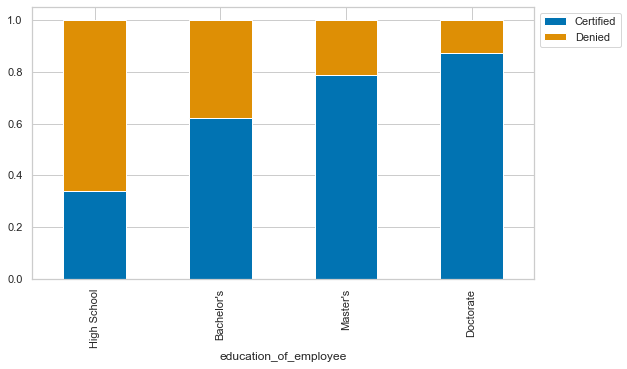

<IPython.core.display.Javascript object>

In [24]:
stacked_barplot(df, "education_of_employee", "case_status")

**Answer:** As we can clearly corroborate in the former table and visualization, the higher the academic degree of the applicant, the higher are the chances of being certified. A person with just a High School diploma has a low chance of being certified; just a Bachelor's degree improves the chances from under 40% to over 60%. An applicant holding a Master's degree has about 80% chances, while a Doctorate holding applicant has almost 90% chance.

#### 2. How does the visa status vary across different continents? 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
---------------------------------------------


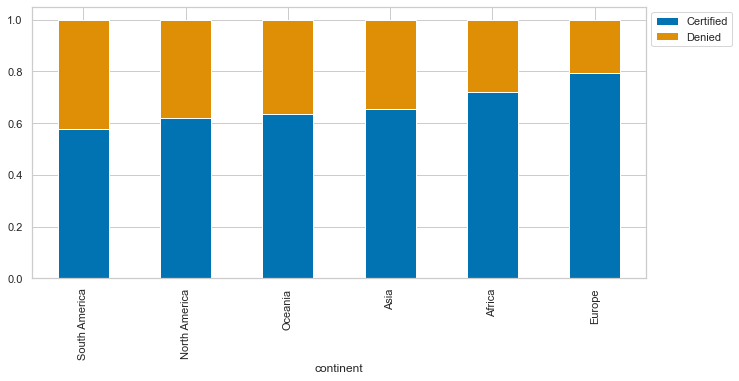

<IPython.core.display.Javascript object>

In [25]:
stacked_barplot(df, "continent", "case_status")

**Answer:** The chances of being certified varies across the employee's continent of origin. Applicants whose continent of origin is Europe show the best chances (about 80%), followed by Africa (just over 70%), Asia (about 65%), Oceania and North America (a litle under 65%), while South Americans have the worst chances (under 60%).

#### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
-------------------------------------------------


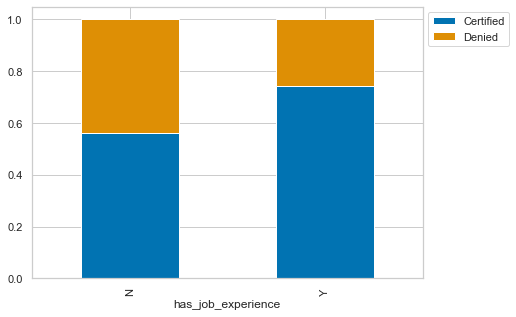

<IPython.core.display.Javascript object>

In [26]:
stacked_barplot(df, "has_job_experience", "case_status")

**Answer:** While we cannot infer causation just from this analysis, it looks as if having prior experience is related to better chances of certification (approx. 75% vs 55%).

#### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
---------------------------------------------


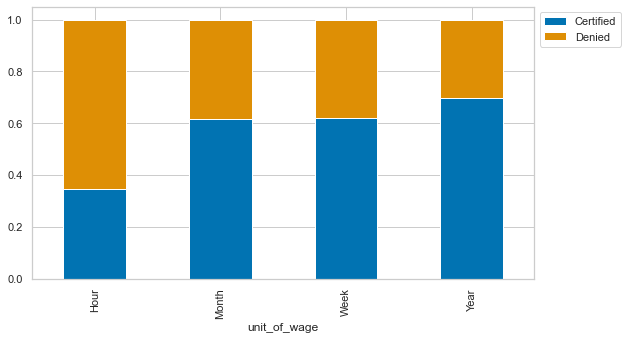

<IPython.core.display.Javascript object>

In [27]:
stacked_barplot(df, "unit_of_wage", "case_status")

**Answer:**
A priori, the unit in which the employee's wages are expressed shouldn't have a relationship with the chances of being certified, but data tells us that that is the case: applicants whose income is expressed in USD/hour are noticeably less likely to be certified (less than 40% chance), while being paid by the week or by the month seems to reduce a bit the chances of certification (Approx. 60% chance compared to about 70% for positions whose wages are expressed in USD/year). Maybe jobs that pay by the hour are low-skilled or temporary (making applicants less likely to be considered for a working visa), and a similar situation affects jobs paid by the week or by the month (while much less than the former case).

#### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

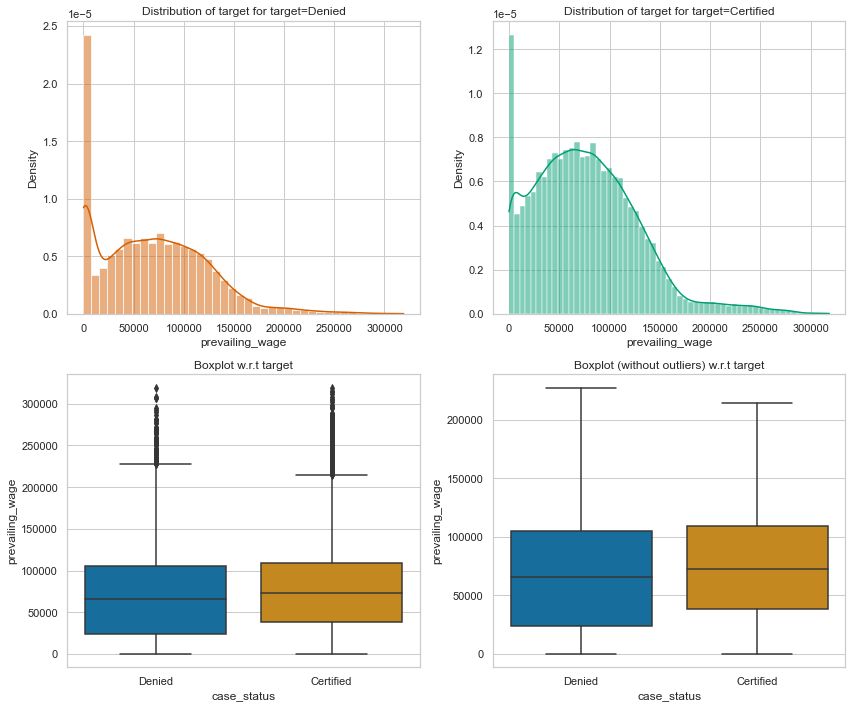

<IPython.core.display.Javascript object>

In [28]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status", figsize=(12, 10))

**Answer:**
The distribution of the prevailing wage seems to show a slight (but hardly significative) difference between the different values of the case status.

### Detailed EDA - Univariate Analysis:

In [29]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.columns.drop(num_cols)

<IPython.core.display.Javascript object>



Feature: no_of_employees


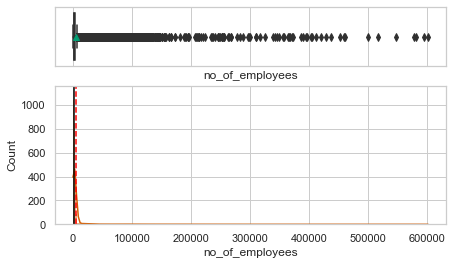



Feature: yr_of_estab


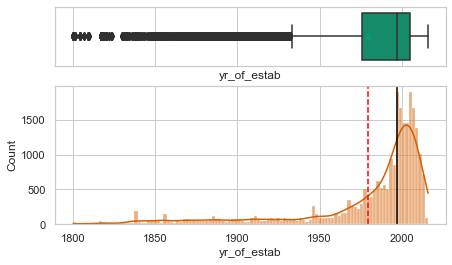



Feature: prevailing_wage


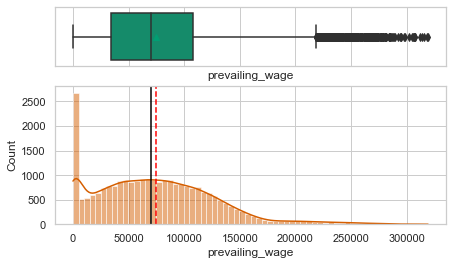

<IPython.core.display.Javascript object>

In [30]:
# univariate plots for numerical variables
for cat in num_cols:
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    histogram_boxplot(df, cat, figsize=(7, 4), kde=True)
    plt.show()

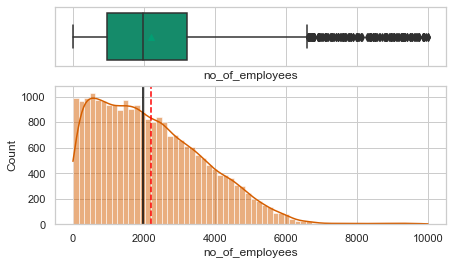

<IPython.core.display.Javascript object>

In [31]:
# closer examination of lower end of number of employees
histogram_boxplot(
    df[df["no_of_employees"] < 10000], "no_of_employees", figsize=(7, 4), kde=True
)

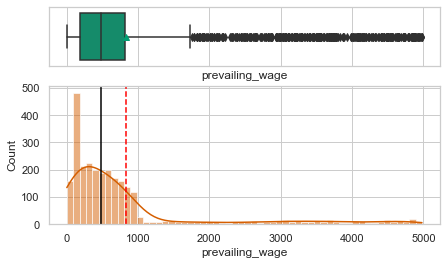

<IPython.core.display.Javascript object>

In [32]:
# closer examination of lower end of prevailing wages
histogram_boxplot(
    df[df["prevailing_wage"] < 5000], "prevailing_wage", figsize=(7, 4), kde=True
)

**Observations:**
* Employees per company has an extremely right skewed distribution. Most applicants are going to work for companies with no more than 6000 employees, but there are a few bigger ones. From some research about the biggest employers worlwide and in the US, maybe these high values are reported as worldwide employees of translational corporations and not just US employees.
* The bulk of companies were established after 1970. The most frequent establishment years are around the late 90's and early 2000's.
* Prevailing wages have a mostly symmetrical distribution around about 75,000 USD/year, with a high peak at the lower end comprising wages under about 1,000 USD/year, and a long right tail that extends up to the top values over 300,000 USD/year. As a result, while the mean and median are similar, the distribution ends up being right-skewed. Of course the odd values at the lower end could be data input mistakes, and those values could well be monthly wages, but there's not enough information to conclude this.



Feature: continent


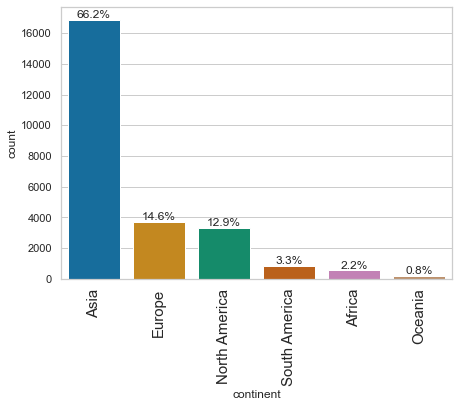



Feature: education_of_employee


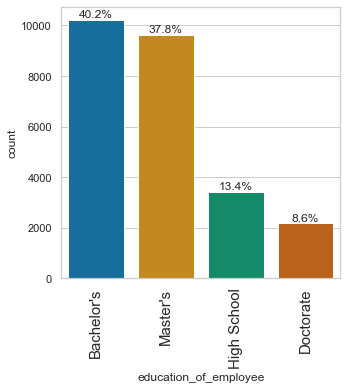



Feature: has_job_experience


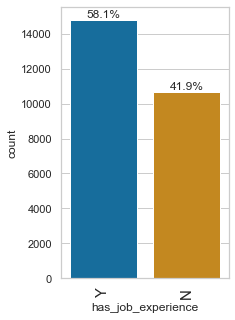



Feature: requires_job_training


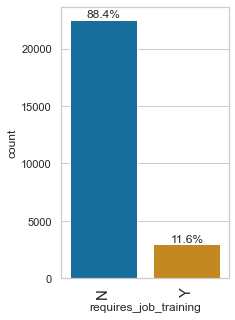



Feature: region_of_employment


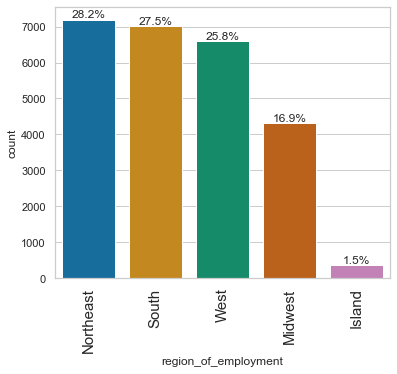



Feature: unit_of_wage


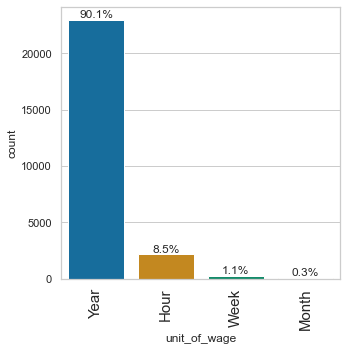



Feature: full_time_position


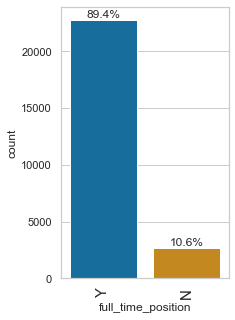



Feature: case_status


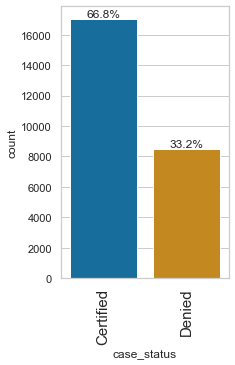

<IPython.core.display.Javascript object>

In [33]:
# univariate plots for categorical variables
for cat in cat_cols:
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    labeled_barplot(df, cat, size=5, perc=True)

**Observations:**
* **continent**: It can be observed that about tow-thirds of applicants come from Asia. Europe and North America are represented with about 15% and 13% of applicants, while the rest of continents have less than 4% each.
* **education_of_employee**: Most applicants have BAchelor's or Master's degrees (40% and 38% respectively). High School graduates represent about 13% while Doctorates are just 9% of applicants.
* **has_job_experience**: 58% of applicants have prior job experience. Having more information about the kind of jobs each applicant is applying to would help understand if the positions that require no experience are low-skilled jobs, for instance.
* **requires_job_training**: 88% of applicants don't require job training. The low percentage of positions requiring training is odd, and might be due to some of the companies not informing this requisite out of (an unfounded) fear of getting their applicant rejected. In fact almost every job requires induction and other forms of training, that's valied even for low-skilled jobs.
* **region_of_employment**: The most frequent region where the position is located in corresponds to Northeast (28%), closely followed by South (28%) and West (26%). The Midwest has a significatively lower proportion of positions (17%), while Island region has a very low percentage.
* **unit_of_wage**: Most (90%) of wages are expressed in USD/Year. Smaller percentages are epressed in USD/hour (9%), week (1%) or month (less than 1%).
* **full_time_position**: Most of the positions (89%) are full-time.
* **case_status**: As said before, 67% of applications included in this dataset got certified.

### Detailed EDA - Multivariate Analysis:

In [34]:
# replacement of categories with 0 and 1 in target variable (Certified = 1)
df["case_status"].replace({"Denied": 0, "Certified": 1}, inplace=True)

<IPython.core.display.Javascript object>

In [35]:
# including target column in the heatmap

num_col_plus = num_cols + ["case_status"]

<IPython.core.display.Javascript object>

#### Correlation Heatmap:

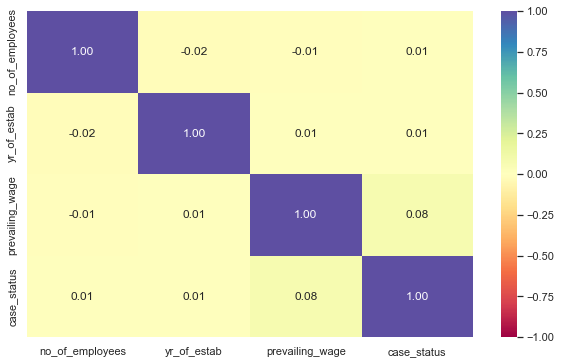

<IPython.core.display.Javascript object>

In [36]:
# Checking the correlations between numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(
    df[num_col_plus].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
# plt.xticks(rotation=45)
plt.show()

**Observation:**
* No significative correlations observed between numerical columns, or between the target variable or any numerical column.

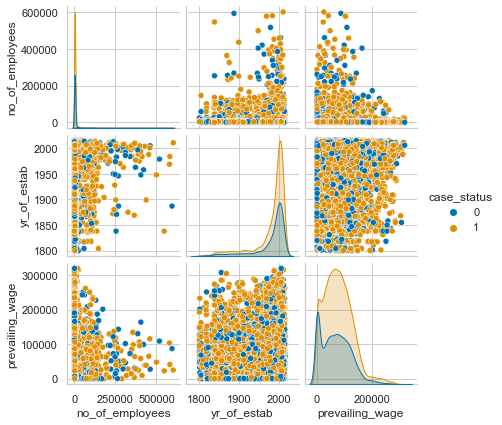

<IPython.core.display.Javascript object>

In [37]:
sns.pairplot(df, diag_kind="kde", hue="case_status", height=2)
plt.show()

**Observation:**
* The conclusions of the previous visualization are confirmed by the pairplot.

#### Relationship between Target Variable and Categorical Variables:



Feature: continent
case_status       0      1    All
continent                        
All            8462  17018  25480
Asia           5849  11012  16861
North America  1255   2037   3292
Europe          775   2957   3732
South America   359    493    852
Africa          154    397    551
Oceania          70    122    192
---------------------------------------------


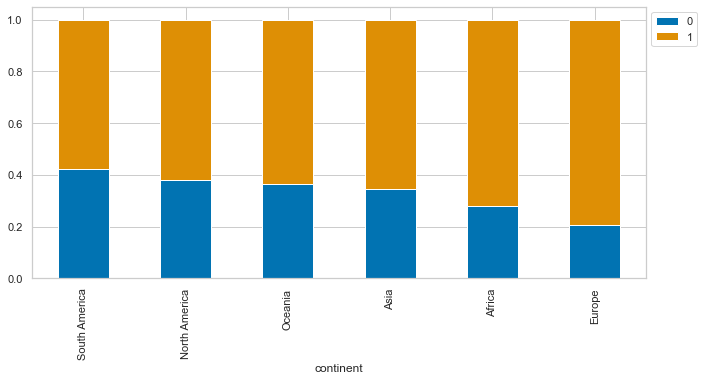



Feature: education_of_employee
case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
Bachelor's             3867   6367  10234
High School            2256   1164   3420
Master's               2059   7575   9634
Doctorate               280   1912   2192
----------------------------------------------------


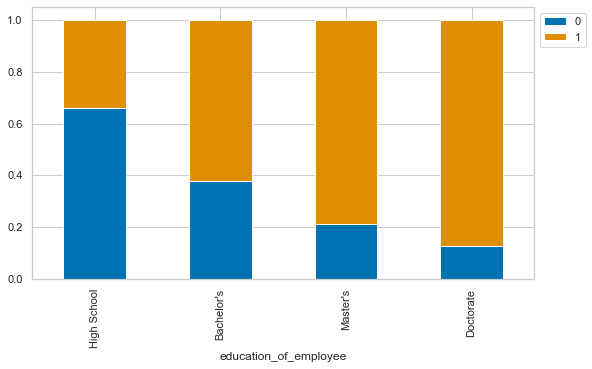



Feature: has_job_experience
case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
N                   4684   5994  10678
Y                   3778  11024  14802
-------------------------------------------------


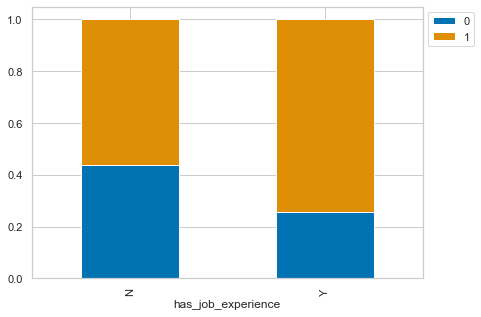



Feature: requires_job_training
case_status               0      1    All
requires_job_training                    
All                    8462  17018  25480
N                      7513  15012  22525
Y                       949   2006   2955
----------------------------------------------------


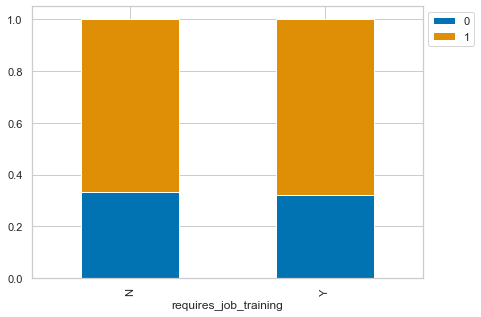



Feature: region_of_employment
case_status              0      1    All
region_of_employment                    
All                   8462  17018  25480
Northeast             2669   4526   7195
West                  2486   4100   6586
South                 2104   4913   7017
Midwest               1054   3253   4307
Island                 149    226    375
---------------------------------------------------


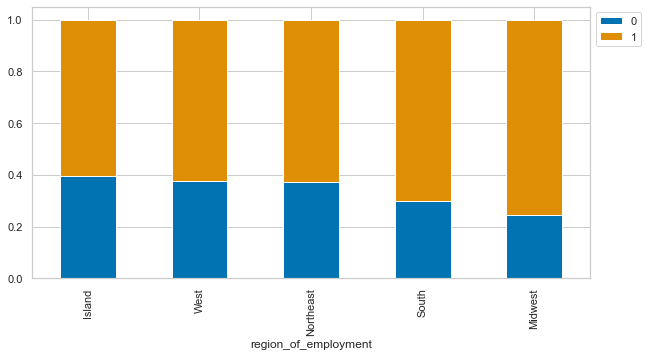



Feature: unit_of_wage
case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
Year          6915  16047  22962
Hour          1410    747   2157
Week           103    169    272
Month           34     55     89
---------------------------------------------


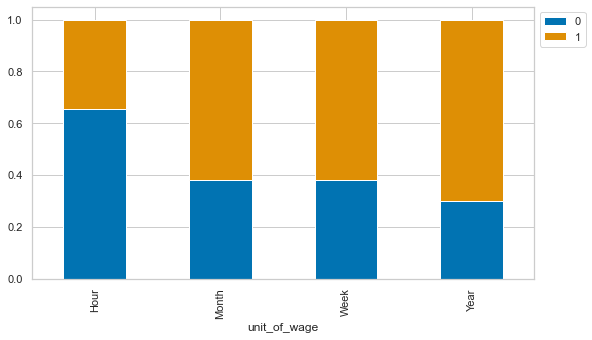



Feature: full_time_position
case_status            0      1    All
full_time_position                    
All                 8462  17018  25480
Y                   7610  15163  22773
N                    852   1855   2707
-------------------------------------------------


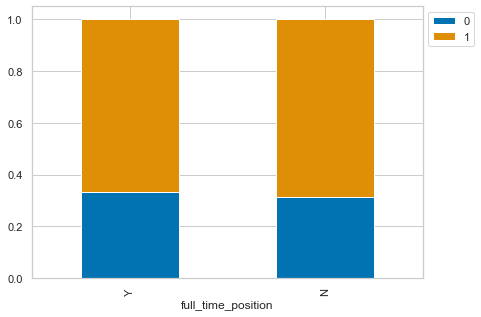

<IPython.core.display.Javascript object>

In [38]:
for cat in cat_cols.drop("case_status"):
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    stacked_barplot(df, cat, "case_status")

**Observations:**
* As said before, the chances of being certified varies across the employee's continent of origin. Applicants whose continent of origin is Europe show the best chances (about 80%), followed by Africa (just over 70%), Asia (about 65%), Oceania and North America (a little under 65%), while South Americans have the worst chances (under 60%).
* The higher the academic degree of the applicant, the higher are the chances of being certified. A person with just a High School diploma has a low chance of being certified; just a Bachelor's degree improves the chances from under 40% to over 60%. An applicant holding a Master's degree has about 80% chances, while a Doctorate holding applicant has almost 90% chance.
* Having job experience improves the chances of getting the visa approval. Inexperienced workers have a likelihood of getting certified of about 55%, while having experience gives the applicant a chance of about 75%.
* The requirement of job training doesn't seem to affect the chances of approval.
* The region of employment that gets the best chances of approval is the Midwest (about 75%) followed by the South (about 70%). The remaining three regions have almost equal chances, each about 60%.
* As said before, applicants whose income is expressed in USD/hr are noticeably less likely to be certified (less than 40% chance), while being paid by the week or by the month seems to reduce a bit the chances of certification (approx. 60% chance compared to about 70% for positions whose wages are expressed in USD/year).
* Applying for a full-time position doesn't seem to affect significatively the chances of getting the visa.

#### Relationship between Prevailing Wages and Categorical Variables:

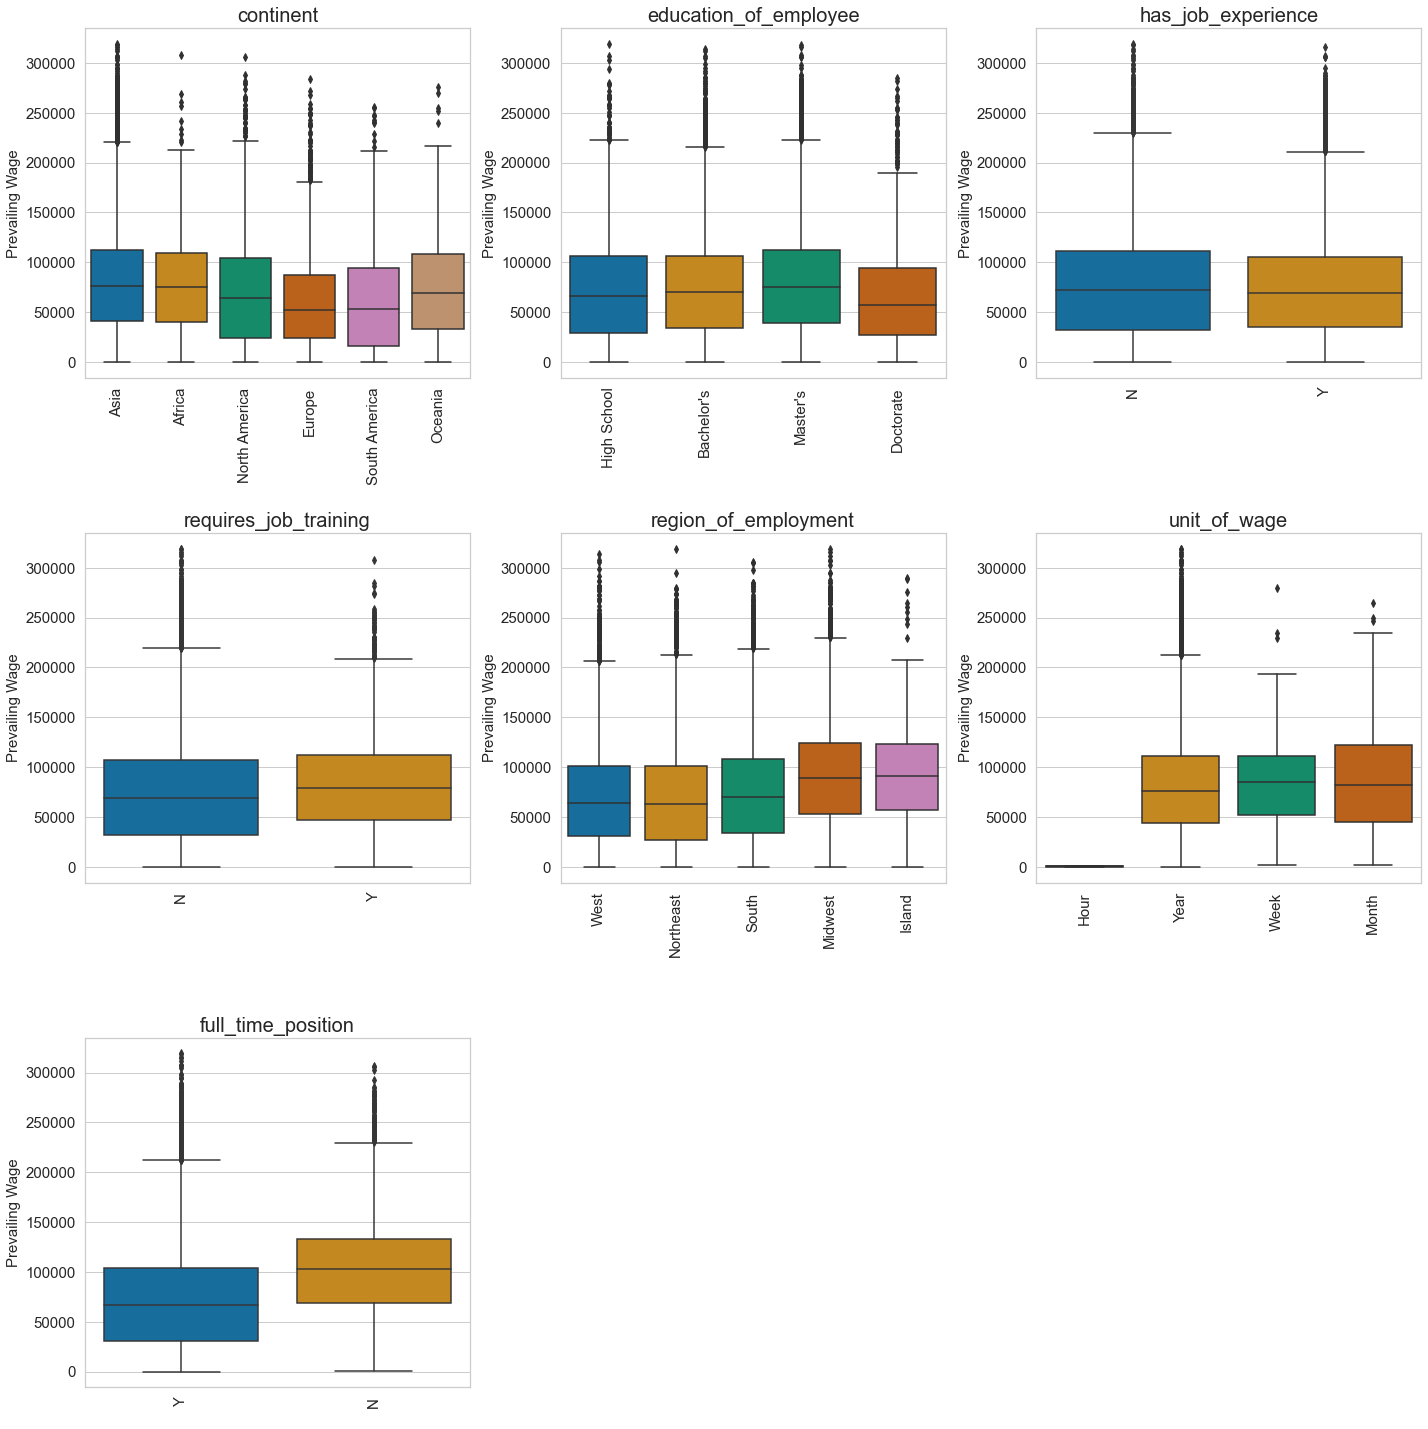

<IPython.core.display.Javascript object>

In [39]:
# variables of interest
cols = cat_cols.drop("case_status")

plt.figure(figsize=(20, 20))

for i, var in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=var, y="prevailing_wage")
    plt.tight_layout()
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(var, fontsize=20)
    plt.ylabel("Prevailing Wage", fontsize=15)
    plt.xlabel(" ")

plt.show()

**Observations:**
* Not every categorical variable is related with prevailing wages.
* By continent, is looks as if applicants from Europe and South America tend to apply to the working visa through jobs requiring lower prevailing wages, with their medians just over 50000 USD/year.
* Doctorate holding applicants have lower requirement of prevailing wage on average (maybe those jobs are part-time research jobs complementing academic -unpaid- activities).
* Job experience doesn't seem to be related to the distribution of prevailing wages.
* Jobs requiring prior experience seem to require higher prevailing wages.
* Jobs located in the Midwest or Island regions seem to have higher prevailing wages; more than 75% of those positions require 50000 USD/year or more.
* Unit of prevailing wage doesn't have a significant relationship, especially considering that most subsets of data are too small to provide good information.
* Full-time positions seem to require lower prevailing wages, with a small percentage requiring more than 100000 USD/year.

#### Relationship between Number of Employees and Categorical Variables:

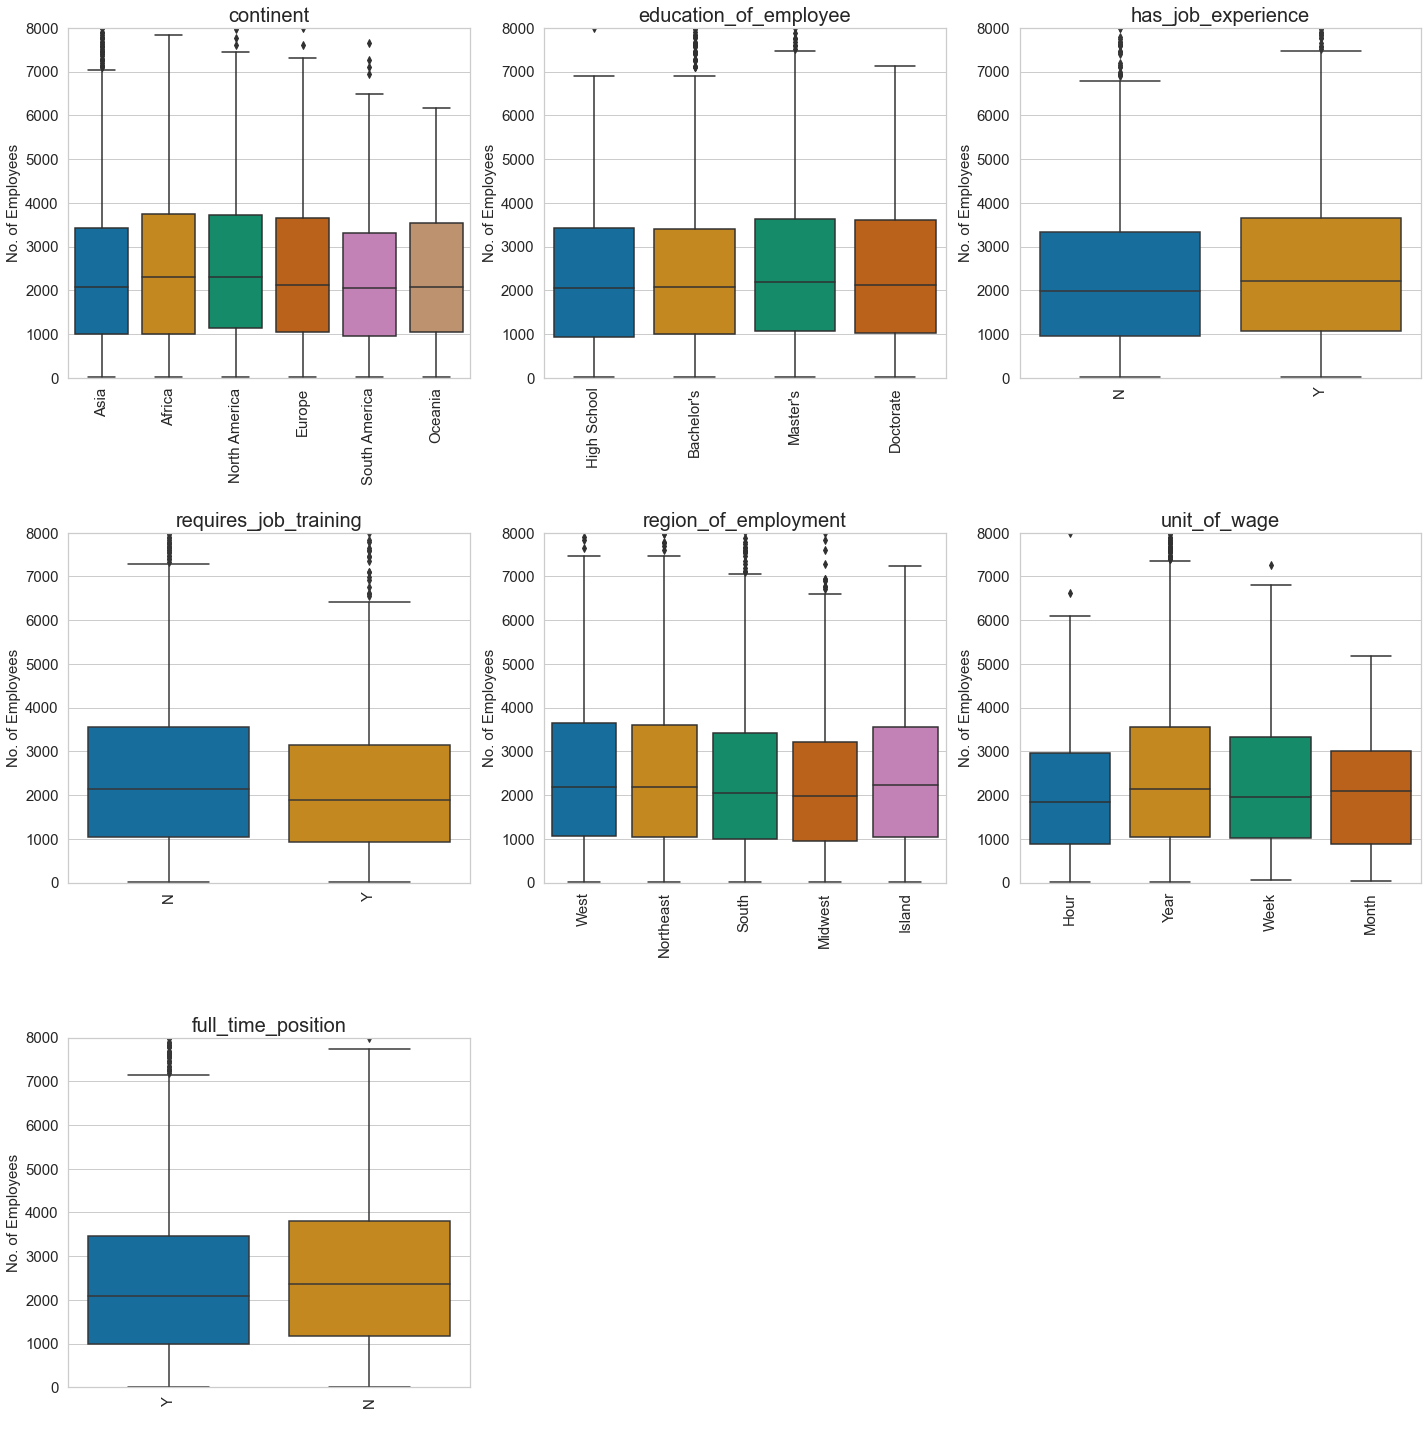

<IPython.core.display.Javascript object>

In [40]:
# variables of interest
plt.figure(figsize=(20, 20))

for i, var in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=var, y="no_of_employees")
    plt.tight_layout()
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(var, fontsize=20)
    plt.ylabel("No. of Employees", fontsize=15)
    plt.xlabel(" ")
    plt.ylim(0, 8000)  # most data points... this variable has a very long upper tail
plt.show()

**Observation:**
* There's very little or no significant relationship between the number of employees and most categorical variables.
* Applicants with prior experience tend to apply for slightly bigger companies.
* Strangely, full time positions tend to pay a little less. This could be due to chance and the small size of the non-full-time subset.

#### Relationship between Year of Establishment and Categorical Variables:

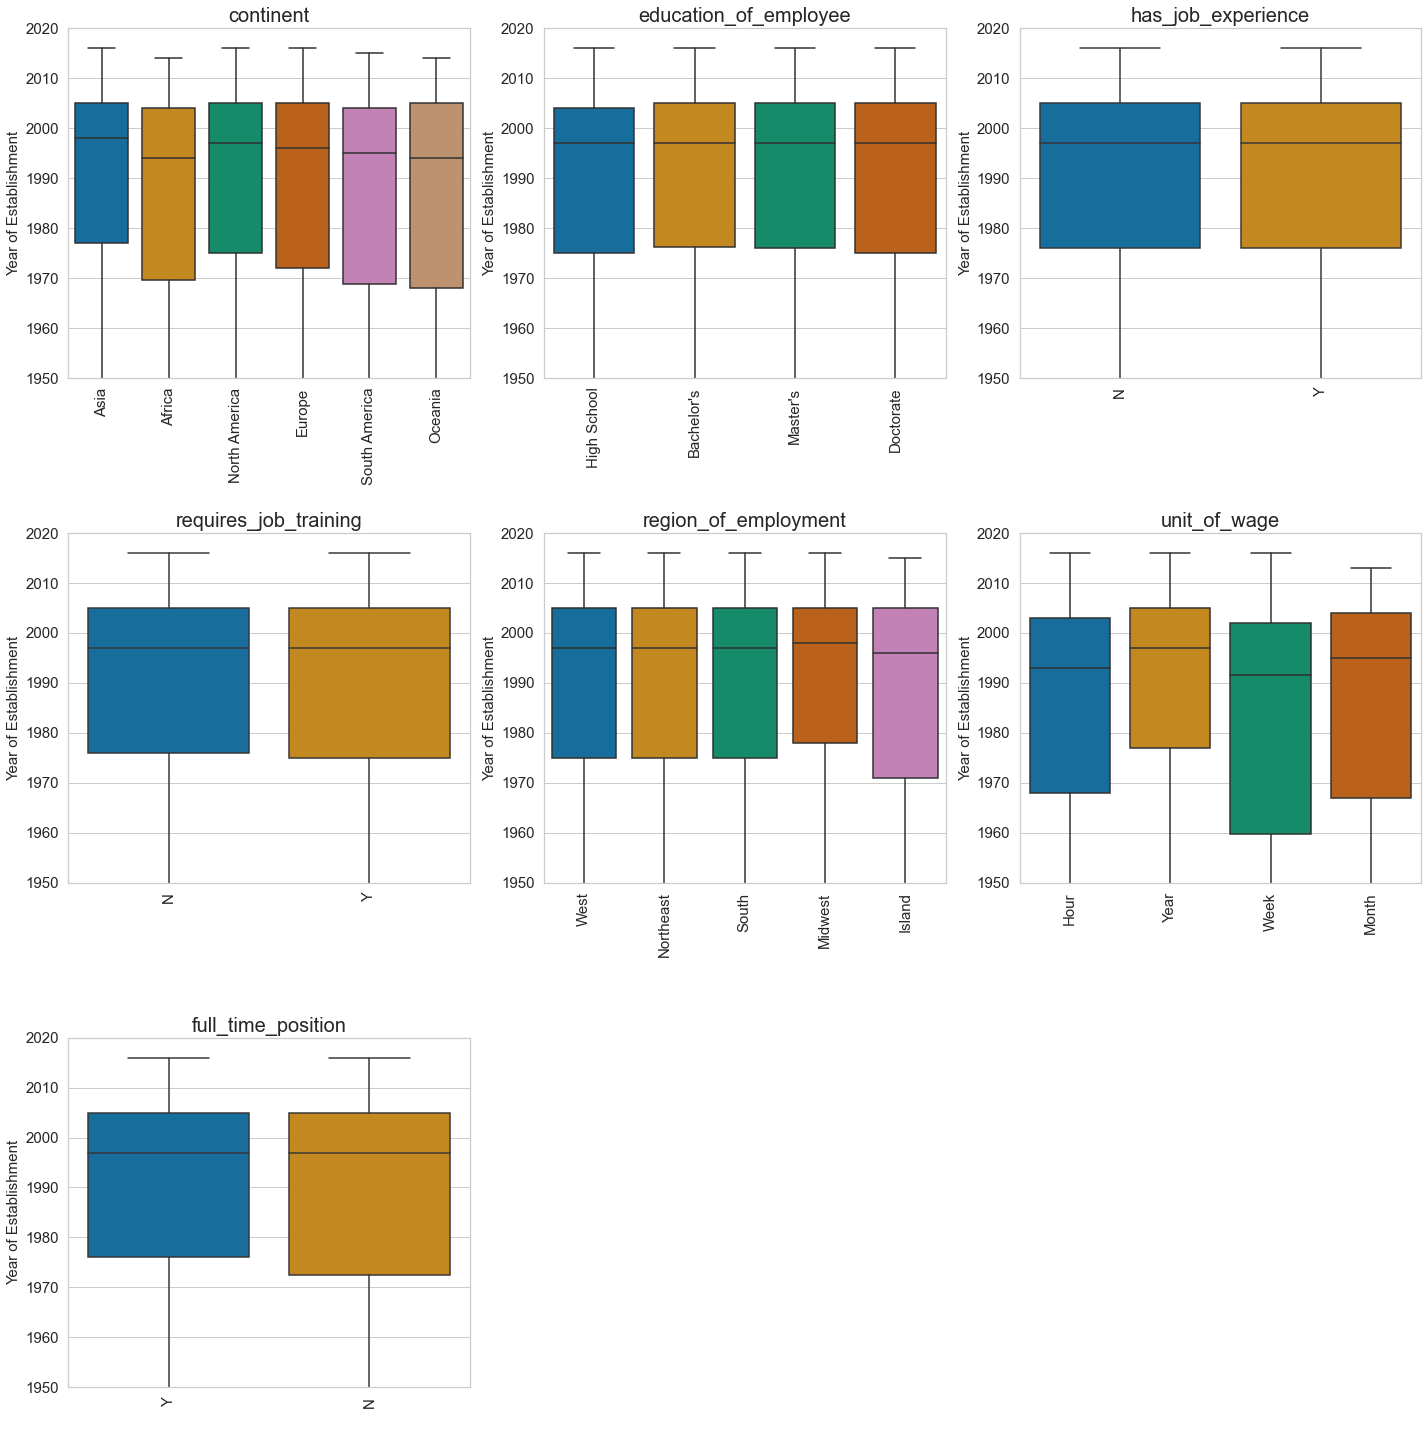

<IPython.core.display.Javascript object>

In [41]:
# variables of interest
plt.figure(figsize=(20, 20))

for i, var in enumerate(cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=var, y="yr_of_estab")
    plt.tight_layout()
    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title(var, fontsize=20)
    plt.ylabel("Year of Establishment", fontsize=15)
    plt.xlabel(" ")
    plt.ylim(1950, 2020)  # most data points... this variable has a very long upper tail
plt.show()

**Observation:**
* There's very little or no significant relationship between the age of the company and most categorical variables.
* As curiosities of little significance we can mention that:
    * Applicants from Africa, South America and Oceania seem to apply through slightly "older" companies.
    * Jobs with the unit of the prevailing wage expressed in USD/hr, USD/week or USD/month tend to be from slightly "older" companies too.

#### Proportion of Full-time Positions vs other Categorical Variables of Interest:



Feature: continent
full_time_position     N      Y    All
continent                             
All                 2707  22773  25480
Asia                1941  14920  16861
North America        571   2721   3292
Europe               115   3617   3732
Africa                31    520    551
South America         31    821    852
Oceania               18    174    192
---------------------------------------------


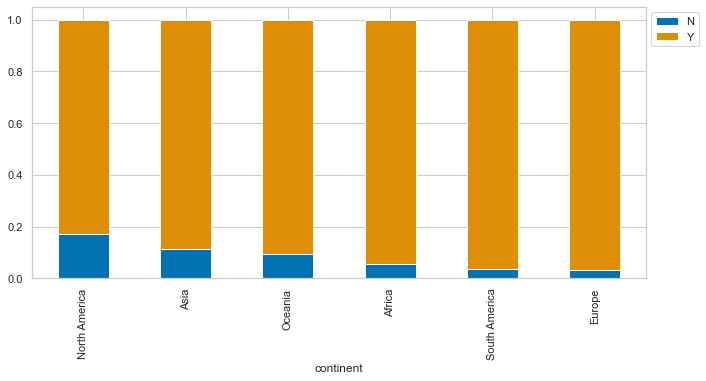



Feature: education_of_employee
full_time_position        N      Y    All
education_of_employee                    
All                    2707  22773  25480
Master's               1738   7896   9634
Bachelor's              683   9551  10234
High School             206   3214   3420
Doctorate                80   2112   2192
----------------------------------------------------


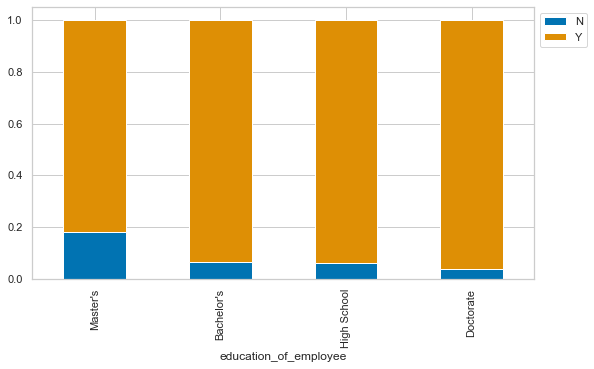



Feature: region_of_employment
full_time_position       N      Y    All
region_of_employment                    
All                   2707  22773  25480
South                  935   6082   7017
Northeast              804   6391   7195
West                   473   6113   6586
Midwest                450   3857   4307
Island                  45    330    375
---------------------------------------------------


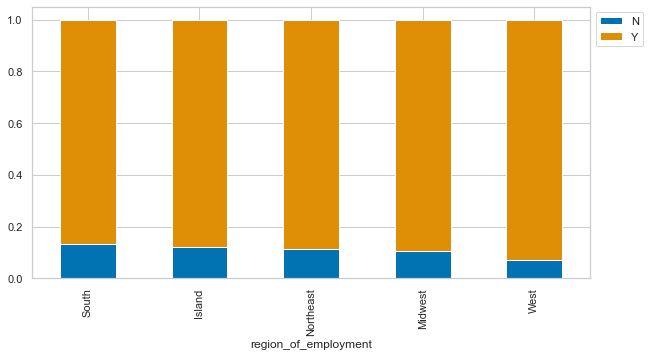

<IPython.core.display.Javascript object>

In [42]:
col = [
    "continent",
    "education_of_employee",
    "region_of_employment",
]
for cat in col:
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    stacked_barplot(df, cat, "full_time_position")

**Observation:**
* Applicants from North America seem to apply through part-time positions more often than the rest (about 18%), while Europeans and South Americans show the least frequency of part-time jobs.
* Applicants with Master's degrees apply through a higher proportion of part-time positions on average (about 18%).
* The Region where the position is located doesn't seem to have a strong relationship with the proportion of full-time jobs, but still there are differences between regions. The West region shows the lowest proportion of part-time jobs, while the South region shows the highest.

#### Proportion of Positions requiring Prior Experience vs other Categorical Variables of Interest:



Feature: continent
has_job_experience      N      Y    All
continent                              
All                 10678  14802  25480
Asia                 7071   9790  16861
Europe               1576   2156   3732
North America        1348   1944   3292
South America         377    475    852
Africa                217    334    551
Oceania                89    103    192
---------------------------------------------


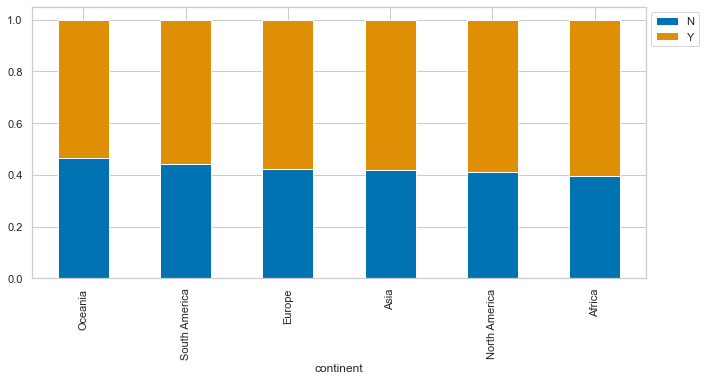



Feature: education_of_employee
has_job_experience         N      Y    All
education_of_employee                     
All                    10678  14802  25480
Bachelor's              4348   5886  10234
Master's                3993   5641   9634
High School             1396   2024   3420
Doctorate                941   1251   2192
----------------------------------------------------


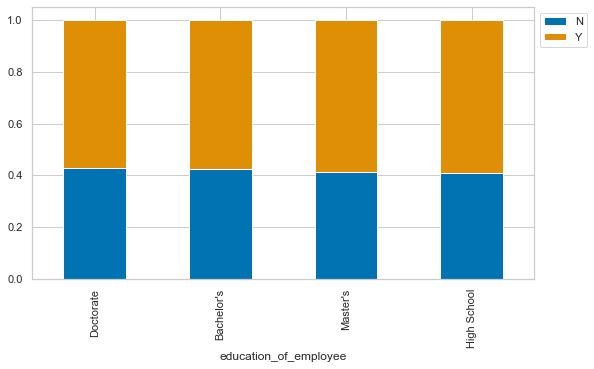



Feature: region_of_employment
has_job_experience        N      Y    All
region_of_employment                     
All                   10678  14802  25480
Northeast              2934   4261   7195
South                  2920   4097   7017
West                   2705   3881   6586
Midwest                1964   2343   4307
Island                  155    220    375
---------------------------------------------------


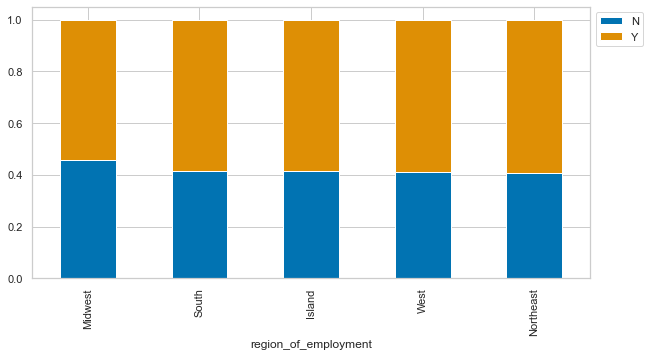

<IPython.core.display.Javascript object>

In [43]:
col = ["continent", "education_of_employee", "region_of_employment"]
for cat in col:
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    stacked_barplot(df, cat, "has_job_experience")

**Observation:**
* There's no strong relationship between continent and proportion of workers with required prior experience, but still Oceania shows the lowest proportion, while Africa shows the highest.
* The level of education of the employee shows a barely noticeably (and probably non-significant) relationship with the chances of prior experience being required.
* The Midwest region seem to require a slightly lower proportion of employees with prior experience, while for the other regions the difference is barely noticeable.

#### Proportion of levels of Education vs other Categorical Variables of Interest:



Feature: continent
education_of_employee  High School  Bachelor's  Master's  Doctorate    All
continent                                                                 
All                           3420       10234      9634       2192  25480
Asia                          2290        7168      6480        923  16861
Europe                         490        1299      1097        846   3732
North America                  401        1225      1408        258   3292
South America                  137         333       293         89    852
Africa                          66         143       288         54    551
Oceania                         36          66        68         22    192
---------------------------------------------


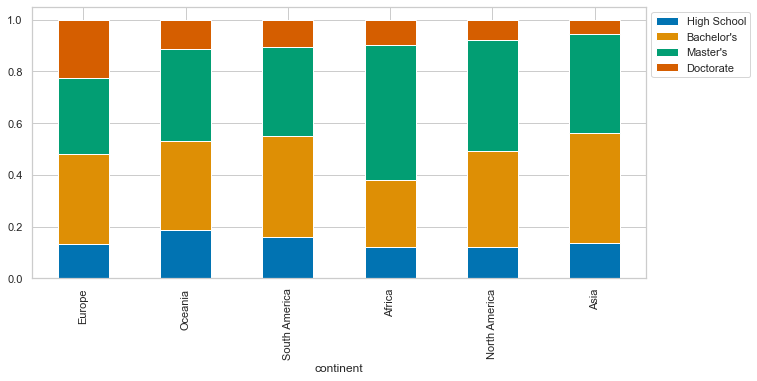



Feature: region_of_employment
education_of_employee  High School  Bachelor's  Master's  Doctorate    All
region_of_employment                                                      
All                           3420       10234      9634       2192  25480
West                           785        2925      2162        714   6586
Northeast                      905        2874      2760        656   7195
South                          934        2991      2551        541   7017
Midwest                        736        1315      2000        256   4307
Island                          60         129       161         25    375
---------------------------------------------------


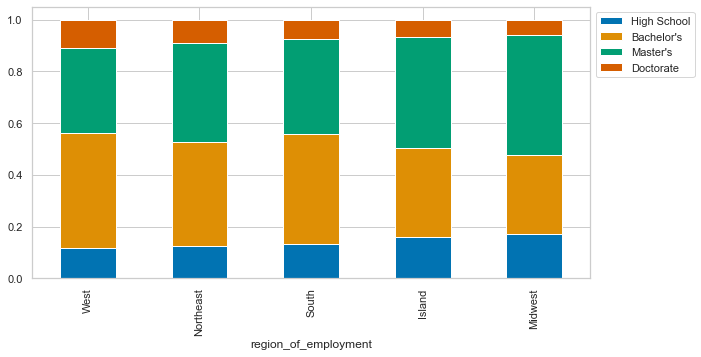

<IPython.core.display.Javascript object>

In [44]:
col = ["continent", "region_of_employment"]
for cat in col:
    print(f"\n\nFeature: {cat}\n" + "=" * (9 + len(cat)))
    stacked_barplot(df, cat, "education_of_employee")

**Observation:**
* Asia is the continent with the highest proportion of Bachelor's degrees holders, while Africa shows the lowest, but at the same time the highest relative number of Master's degrees holders.
* Oceania shows the highest proportion of High School Graduates.
* Europe, North America and Africa have the highest proportion of applicants with higher education overall (also Europe has the highest Doctorates proportion).
* Applicants from Asia show the lowest proportion of Doctorates.
* Knowing the age of each applicant would be useful to understand this phenomenon better.
* People with Master's degrees or High School diplomas are applying relatively more to jobs located in the Midwest, while the West region attracts more people with Bachelor's degrees and Doctorates.

## Data Preprocessing

* Missing value treatment not needed.
* Feature Engineering not needed either.

### Outlier detection and treatment:

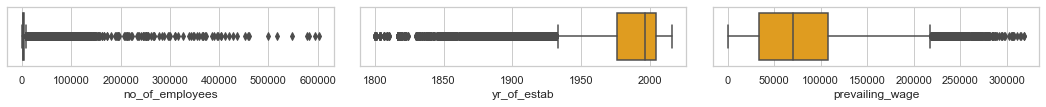

<IPython.core.display.Javascript object>

In [45]:
# outlier detection using boxplots
# num_cols = data1_imp.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 8))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df, x=variable, color="orange")
    plt.tight_layout(pad=2)

plt.show()

**Observations:**
* As we will be dealing with decision tree base estimators instead of linear or logit regressors, outlier values are not really crucial to model performance.
* While the numerical variables show some apparently abnormal values, we don't have enough information to qualify them as invalid.
* No outlier treatment will be undertaken.

### No post-processing EDA needed as no data manipulation was done.

## Building Models: Generalities.

### Some aspects about performance metrics and set balance:

#### Performance Metric Selection:

* Criteria for certifying a particular visa corresponds to the OFLC alone and not to the machine learning tool, whose function will be to help the customer in **shortlisting** the candidates having higher chances of VISA approval, as per the problem statement.
* Some economic aspects about visa approval or rejection:
    * As a principle, an immigrant worker will always contribute to the economy of the host country, by increasing production, consumption and savings. The cost of erroneously rejecting a legitimate applicant is often underestimated.
    * On the other side, short-term negative effects could be caused by an erroneously certified worker, perhaps in costs to the social security system, and a local citizen or resident potentially missing that specific job opportunity.
    * The most important aspect of migrant worker screening might well be to select preferentially those applicants that contribute to the overall mean productivity of the economy, affecting in a neutral or positive way the wages received by workers. Low productivity workers, even if they contribute to the overall economic output, tend to reduce overall productivity and consequently could negatively affect salary levels.
* Finally, we need to pay attention to the objective of this analysis, which is to reduce the work burden of the OFLC. After this machine learning tool screening, there will be further case analysis by the authorities before certifying an applicant. In this regard:
    * **recall** is important, to avoid discarding candidates worth certifying from the short list.
    * **precision** is important to avoid overburdening the OFLC with cases that shouldn't be certified.
* As there's no strong reason to choose one over the other, the **f1-score** will be used as main performance metric, as well as main scorer for model tuning purposes.

#### Set balance:
* The classes are somewhat imbalanced (67%-33%).
* This means using balanced decision trees as estimators is a sound methodology.

### Performance Measuring and Interpretation Auxiliary Functions:

In [46]:
# Performance metrics function for sklearn classifiers.


def model_performance_classification_sklearn(label, model, predictors, target):
    """
    Function to compute different metrics to check classification model performance
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Model": label,
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [47]:
# Confusion matrix for sklearn classifiers


def confusion_matrix_sklearn(model, predictors, target, figsize=(6, 4)):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="mako")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [48]:
# feature importance comparator display
def feat_importance(estimator, X, figsize=(8, 12)):
    importances = estimator.feature_importances_
    indices = np.argsort(importances)
    feature_names = X.columns.tolist()

    plt.figure(figsize=figsize)
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

<IPython.core.display.Javascript object>

### Categorical Encoding for Model Building:

In [49]:
df2 = df.copy()  # making the changes in a new dataframe

<IPython.core.display.Javascript object>

In [50]:
# integer encoder for categorical "ordered" columns (regarding relationship with respect to target variable)
int_encoder = {
    "education_of_employee": {
        "High School": 0,
        "Bachelor's": 1,
        "Master's": 2,
        "Doctorate": 3,
    },
    "has_job_experience": {"N": 0, "Y": 1},
    "requires_job_training": {"N": 0, "Y": 1},
    "full_time_position": {"N": 0, "Y": 1},
}

# columns with un-ordered data will be one-hot-encoded
one_hot_cols = ["continent", "region_of_employment", "unit_of_wage"]

<IPython.core.display.Javascript object>

In [51]:
df2 = df2.replace(int_encoder)
df2 = pd.get_dummies(df2, columns=one_hot_cols, drop_first=True)
df2.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0,0,0,14513,2007,592.2029,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,2,1,0,2412,2002,83425.6500,1,1,1,0,0,0,0,0,1,0,0,0,0,1
2,1,0,1,44444,2008,122996.8600,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,98,1897,83434.0300,1,0,1,0,0,0,0,0,0,0,1,0,0,1
4,2,1,0,1082,2005,149907.3900,1,1,0,0,0,0,0,0,0,1,0,0,0,1


<IPython.core.display.Javascript object>

In [52]:
# transforming encoded category into integer to avoid potential problems with the models
df2.education_of_employee = df2.education_of_employee.astype(int)

<IPython.core.display.Javascript object>

### Data Preparation for Classification Models:

In [53]:
# Model data

# independent  and dependent variables
X = df2.drop(["case_status"], axis=1)
y = df2["case_status"]

# Train and Test sets (stratify to improve the relative composition between training and testing data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [54]:
feature_names = X_train.columns.tolist()  # for general use

<IPython.core.display.Javascript object>

In [55]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 19)
Shape of test set :  (7644, 19)
Percentage of classes in training set:
1   0.6679
0   0.3321
Name: case_status, dtype: float64
Percentage of classes in test set:
1   0.6678
0   0.3322
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

Stratifying the data split kept the class proportion for both sets almost equal.

## Building and Tuning a Decision Tree Model:

### Exploratory non-tuned Model:

In [56]:
# Baseline: a weighted decision tree (to reduce performance issues due to imbalanced classes)
d_tree = DecisionTreeClassifier(class_weight="balanced", random_state=1)

<IPython.core.display.Javascript object>

In [57]:
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

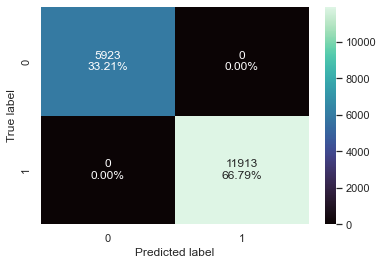

<IPython.core.display.Javascript object>

In [58]:
confusion_matrix_sklearn(d_tree, X_train, y_train)

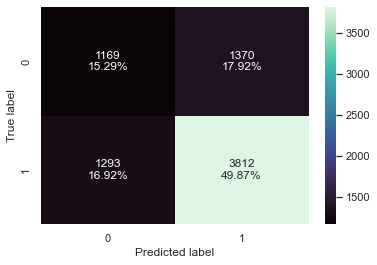

<IPython.core.display.Javascript object>

In [59]:
confusion_matrix_sklearn(d_tree, X_test, y_test)

From the simple inspection of the confusion matrices, we can observe that the raw decision tree overfit the training data, as expected. Tuning (pruning) is always needed for these models!

In [60]:
# adding to the performance tracker
model_perf_tracker = model_performance_classification_sklearn(
    "Decision Tree - train", d_tree, X_train, y_train,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Decision Tree - test", d_tree, X_test, y_test,
        ),
    ],
    ignore_index=True,
)
model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411


<IPython.core.display.Javascript object>

The differences in performance between training and testing sets, and the exaggerated performance of the raw Decision Tree show the degree of overfitting.

### Decision Tree - Tuned (Pre-pruning):

In [61]:
# Classifier
d_tree_model = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters
parameters = {
    "max_depth": np.arange(5, 20, 5),
    "min_samples_leaf": [5, 7, 10],
    "max_leaf_nodes": [5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Scoring selection
scorer = metrics.make_scorer(metrics.f1_score)

# Running the grid search
grid_obj = GridSearchCV(d_tree_model, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the model with the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fitting the resulting model
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, min_samples_leaf=5,
                       random_state=1)

<IPython.core.display.Javascript object>

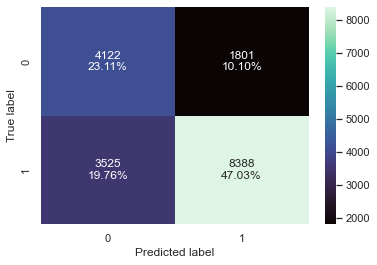

<IPython.core.display.Javascript object>

In [62]:
confusion_matrix_sklearn(d_tree_tuned, X_train, y_train)

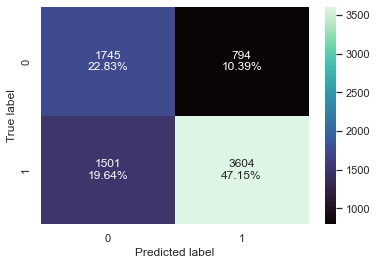

<IPython.core.display.Javascript object>

In [63]:
confusion_matrix_sklearn(d_tree_tuned, X_test, y_test)

Pre-pruning practically eliminated overfitting. Let's check the overall performances:

In [64]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Decision Tree (tuned) - train", d_tree_tuned, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Decision Tree (tuned) - test", d_tree_tuned, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585


<IPython.core.display.Javascript object>

Tuning the Decision Tree Classifier improved overall performance and greatly reduced overfitting.

### Feature Importance (Tuned Decision Tree):

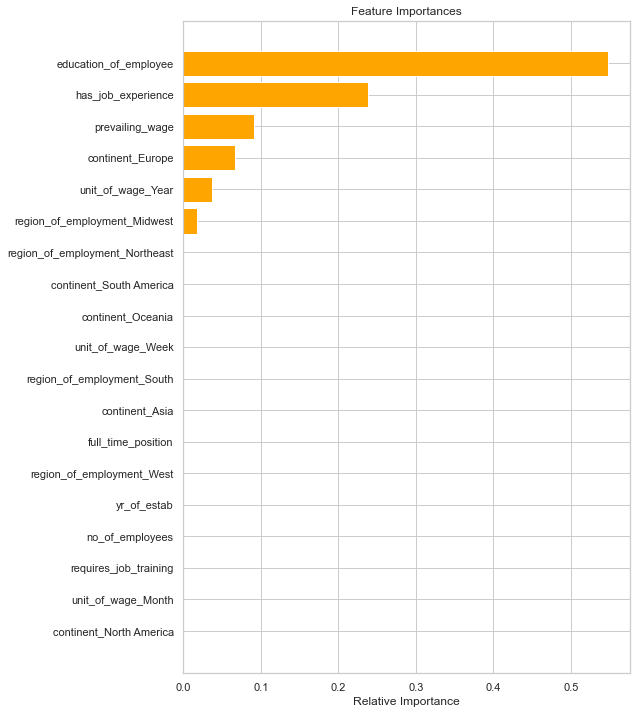

<IPython.core.display.Javascript object>

In [65]:
feat_importance(d_tree_tuned, X_train)

* The most important features used by the Decision Tree model for node splitting and thus, final classification, are the education level of the employee and his previous job experience. Other, less important features:
    * Prevailing wage for the position,
    * Continent of Origin (Europe),
    * Unit of prevailing wage and region are much less important.

## Building and Tuning Bagging Models:

### Bagging Classifier:

In [66]:
# Will use as base estimator a weighted decision tree to equalize the model comparison baseline.
bag = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(class_weight="balanced", random_state=1),
    random_state=1,
)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        random_state=1),
                  random_state=1)

<IPython.core.display.Javascript object>

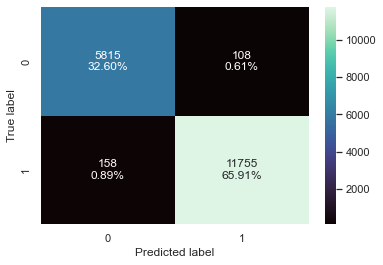

<IPython.core.display.Javascript object>

In [67]:
confusion_matrix_sklearn(bag, X_train, y_train)

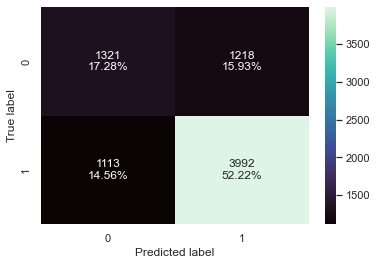

<IPython.core.display.Javascript object>

In [68]:
confusion_matrix_sklearn(bag, X_test, y_test)

The raw Bagging model is clearly overfitting.

In [69]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Bagging Classifier - train", bag, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Bagging Classifier - test", bag, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585
4,Bagging Classifier - train,0.9851,0.9867,0.9909,0.9888
5,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740


<IPython.core.display.Javascript object>

The overfit from the raw Bagging Classifier is evident in this table. Let's check the performance after tuning:

### Bagging Classifier - Tuned:

In [70]:
# grid search - bagging classifier
be1 = DecisionTreeClassifier(class_weight="balanced", random_state=1)
param_grid = {
    "base_estimator": [be1],
    "base_estimator__max_depth": [5, 8, 10],
    "n_estimators": [81, 101, 121],
    "max_features": [0.6, 0.7, 0.8],
    "oob_score": [True],
}

grid = GridSearchCV(
    BaggingClassifier(random_state=1), param_grid=param_grid, scoring="f1", cv=5
)
grid.fit(X_train, y_train)

# getting the best estimator
bag_tuned = grid.best_estimator_
bag_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=10,
                                                        random_state=1),
                  max_features=0.8, n_estimators=121, oob_score=True,
                  random_state=1)

<IPython.core.display.Javascript object>

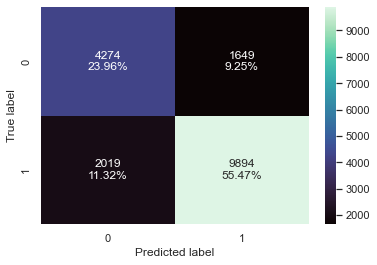

<IPython.core.display.Javascript object>

In [71]:
confusion_matrix_sklearn(bag_tuned, X_train, y_train)

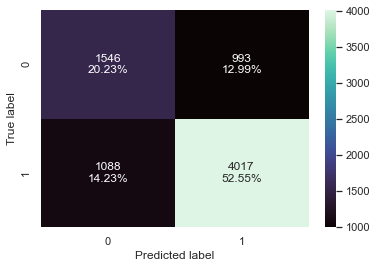

<IPython.core.display.Javascript object>

In [72]:
confusion_matrix_sklearn(bag_tuned, X_test, y_test)

The overfitting is greatly reduced; accuracy and recall seem to be at decent levels.

In [73]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Bagging Classifier (tuned) - train", bag_tuned, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Bagging Classifier (tuned) - test", bag_tuned, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585
4,Bagging Classifier - train,0.9851,0.9867,0.9909,0.9888
5,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740
6,Bagging Classifier (tuned) - train,0.7943,0.8305,0.8571,0.8436
7,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943


<IPython.core.display.Javascript object>

The tuned Bagging Classifier model outperforms the tuned Decision Tree, but overfits more.

### Feature Importance (Tuned Bagging Classifier):

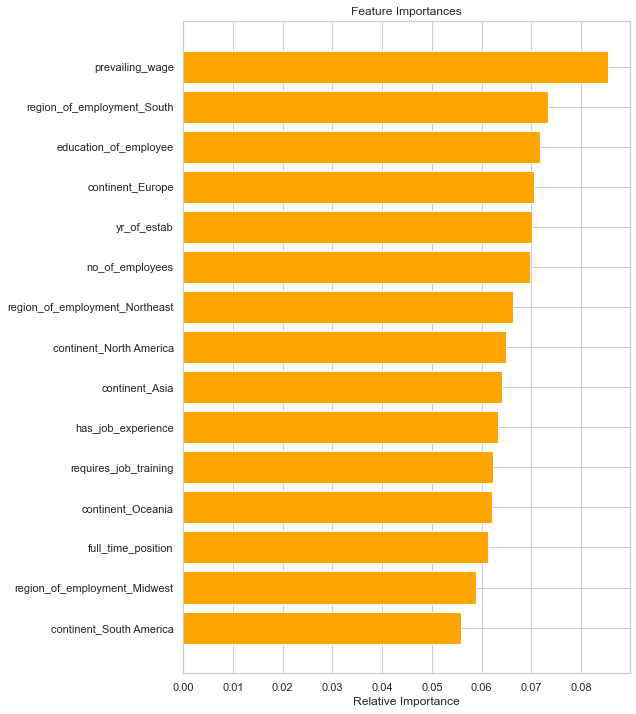

<IPython.core.display.Javascript object>

In [74]:
# Alternative method for the mean importance of features in Bagging Models
importances = np.mean(
    [tree.feature_importances_ for tree in bag_tuned.estimators_], axis=0
)
indices = np.argsort(importances)
feature_names = X_train.columns.tolist()

plt.figure(figsize=(8, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

As we can see from this purely academic exercise, the mean of relative importances of features for a Bagging model tend to equalize a bit compared to the relative importances from the Decision Tree model. Still, important features like education of the employee and prevailing wage remain on top.

### Random Forest Classifier:

In [75]:
# Will use a weighter model to conserve the model comparison baseline
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

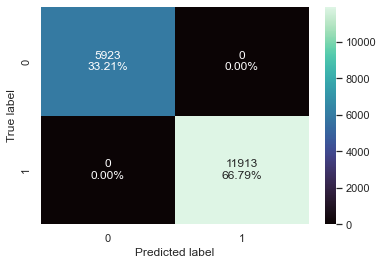

<IPython.core.display.Javascript object>

In [76]:
confusion_matrix_sklearn(rf, X_train, y_train)

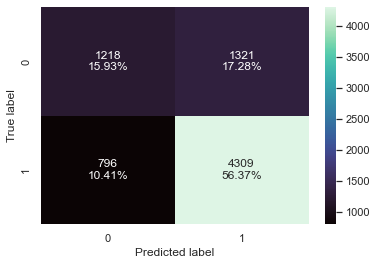

<IPython.core.display.Javascript object>

In [77]:
confusion_matrix_sklearn(rf, X_test, y_test)

The raw Random Forest Classifier ended up overfitting a lot.

In [78]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Random Forest Classifier - train", rf, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Random Forest Classifier - test", rf, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585
4,Bagging Classifier - train,0.9851,0.9867,0.9909,0.9888
5,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740
6,Bagging Classifier (tuned) - train,0.7943,0.8305,0.8571,0.8436
7,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943
8,Random Forest Classifier - train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Classifier - test,0.7231,0.8441,0.7654,0.8028


<IPython.core.display.Javascript object>

With this level of overfit, we need to check up a tuned model before assessing Random Forest as a useful model.

### Random Forest Classifier - Tuned:

In [79]:
# Classifier (weighted)
rf_estimator = RandomForestClassifier(
    class_weight="balanced", oob_score=True, random_state=1
)

# Grid of parameters
parameters = {
    "max_depth": [5, 8, 10],
    "n_estimators": [101, 111, 121],
    "min_samples_split": [5, 7, 10],
    "max_features": ["log2", "auto"],
}

# Grid Search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring="f1", cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the model to the best parameters
rf_tuned = grid_obj.best_estimator_

# Fitting the model
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', min_samples_split=5,
                       n_estimators=101, oob_score=True, random_state=1)

<IPython.core.display.Javascript object>

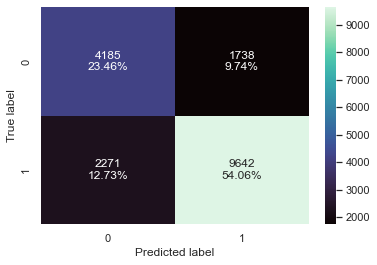

<IPython.core.display.Javascript object>

In [80]:
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

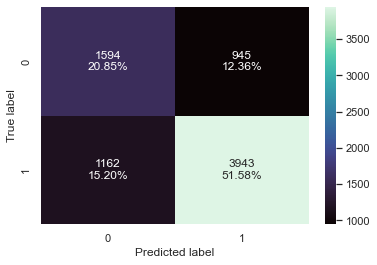

<IPython.core.display.Javascript object>

In [81]:
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

The overfitting is greatly reduced, accuracy and recall seem to be at decent levels. Now let's check overall performance:

In [82]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Random Forest Classifier (tuned) - train", rf_tuned, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Random Forest Classifier (tuned) - test", rf_tuned, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585
4,Bagging Classifier - train,0.9851,0.9867,0.9909,0.9888
5,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740
6,Bagging Classifier (tuned) - train,0.7943,0.8305,0.8571,0.8436
7,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943
8,Random Forest Classifier - train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Classifier - test,0.7231,0.8441,0.7654,0.8028


<IPython.core.display.Javascript object>

Random Forest tuned model is not performing better than the tuned Bagging model, but is overfitting less.

### Feature Importances (Tuned Random Forest Classifier):

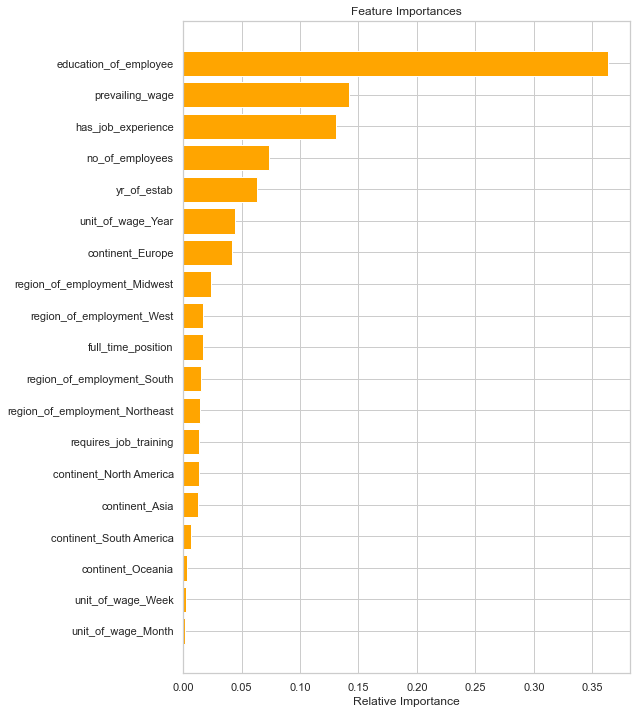

<IPython.core.display.Javascript object>

In [83]:
feat_importance(rf_tuned, X_train)

* The most important features for the Random Forest model are the education level of employee, prevailing wages and employee's previous job experience. Other significative features:
    * Company's number of employees,
    * Company's year of establishment,
    * Unit of prevaling wages being USD/year,
    * Continent of origin being Europe,
    * other features, like region, which are much less important.

## Building and Tuning Boosting Models:

### AdaBoost Classifier:

In [84]:
# Fitting the model
ab = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(class_weight="balanced", random_state=1),
    random_state=1,
)
ab.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         random_state=1),
                   random_state=1)

<IPython.core.display.Javascript object>

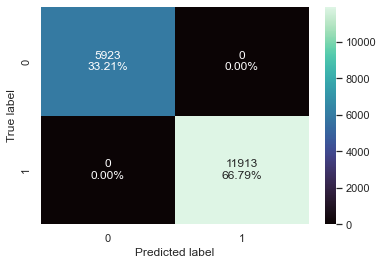

<IPython.core.display.Javascript object>

In [85]:
confusion_matrix_sklearn(ab, X_train, y_train)

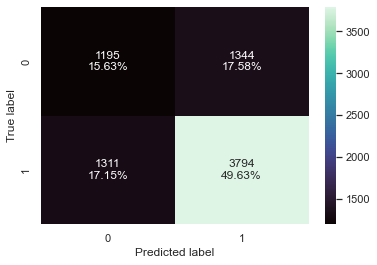

<IPython.core.display.Javascript object>

In [86]:
confusion_matrix_sklearn(ab, X_test, y_test)

The AdaBoost raw model overfits a lot too.

In [87]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "AdaBoost Classifier - train", ab, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "AdaBoost Classifier - test", ab, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585
4,Bagging Classifier - train,0.9851,0.9867,0.9909,0.9888
5,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740
6,Bagging Classifier (tuned) - train,0.7943,0.8305,0.8571,0.8436
7,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943
8,Random Forest Classifier - train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Classifier - test,0.7231,0.8441,0.7654,0.8028


<IPython.core.display.Javascript object>

Let's check up the tuned AdaBoost model.

### AdaBoost Classifier - Tuned:

In [88]:
# Classifier
ab_model = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=1),
        DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=2),
    ],
    "n_estimators": np.arange(91, 112, 10),
    "learning_rate": np.arange(0.05, 0.16, 0.05),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ab_model, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                       1: 0.33},
                                                         max_depth=1),
                   learning_rate=0.1, n_estimators=101, random_state=1)

<IPython.core.display.Javascript object>

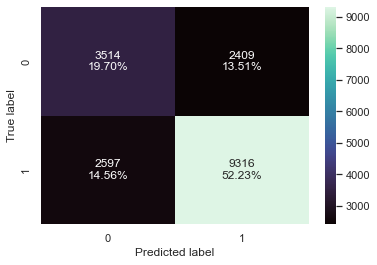

<IPython.core.display.Javascript object>

In [89]:
confusion_matrix_sklearn(ab_tuned, X_train, y_train)

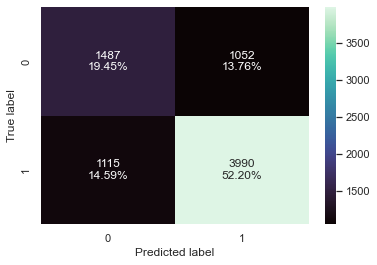

<IPython.core.display.Javascript object>

In [90]:
confusion_matrix_sklearn(ab_tuned, X_test, y_test)

The overfitting is gone and performance levels look good.

In [91]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "AdaBoost Classifier (tuned) - train", ab_tuned, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "AdaBoost Classifier (tuned) - test", ab_tuned, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585
4,Bagging Classifier - train,0.9851,0.9867,0.9909,0.9888
5,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740
6,Bagging Classifier (tuned) - train,0.7943,0.8305,0.8571,0.8436
7,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943
8,Random Forest Classifier - train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Classifier - test,0.7231,0.8441,0.7654,0.8028


<IPython.core.display.Javascript object>

Tuning greatly improved test performance for the AdaBoost model and also practically eliminated overfitting. This model's performance is comparable with the Random Forest but its overfitting is much less.

### Feature Importance (Tuned AdaBoost Classifier):

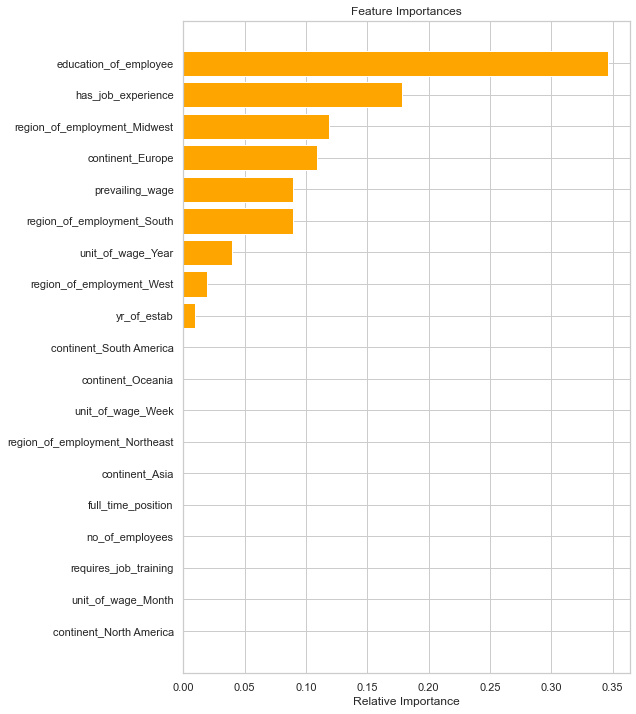

<IPython.core.display.Javascript object>

In [92]:
feat_importance(ab_tuned, X_train)

* The most important features for the AdaBoost model are the education level of employee and his previous job experience. Other significative features:
    * Position location (Midwest),
    * Continent of origin being Europe,
    * Prevailing wages for the position,
    * Position location (South).
    * Unit of wages, location in West region and Year of establishment are much less important.

### Gradient Boosting Classifier:

In [93]:
# Fitting the model
gb = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1), random_state=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

<IPython.core.display.Javascript object>

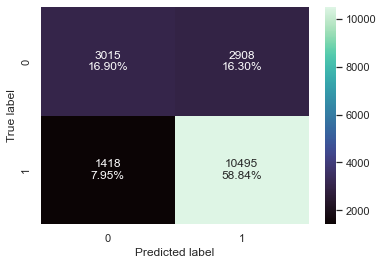

<IPython.core.display.Javascript object>

In [94]:
confusion_matrix_sklearn(gb, X_train, y_train)

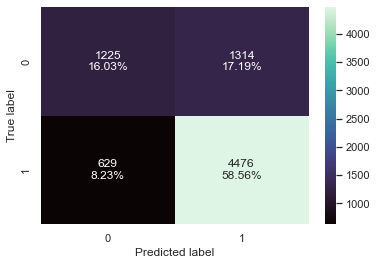

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_sklearn(gb, X_test, y_test)

Gradient Boosting using the default hyperparameters ("raw") didn't overfit and got it quite right in the first try.

In [96]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Gradient Boosting Classifier - train", gb, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Gradient Boosting Classifier - test", gb, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585
4,Bagging Classifier - train,0.9851,0.9867,0.9909,0.9888
5,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740
6,Bagging Classifier (tuned) - train,0.7943,0.8305,0.8571,0.8436
7,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943
8,Random Forest Classifier - train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Classifier - test,0.7231,0.8441,0.7654,0.8028


<IPython.core.display.Javascript object>

It can be observed that Gradient Boosting Classifier model, even without tuning, surpassed every previously tried model in performance, without overfitting the training data.

### Gradient Boosting Classifier - Tuned:

In [97]:
# Choose the type of classifier.
gb_model = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [90, 100, 110],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.8, 0.9, 1, None],
    "learning_rate": np.arange(0.05, 0.16, 0.05),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gb_model, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Setting the model with the best parameters
gb_tuned = grid_obj.best_estimator_

# Fitting the model
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

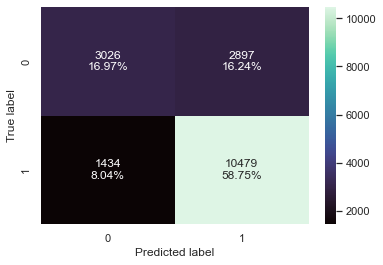

<IPython.core.display.Javascript object>

In [98]:
confusion_matrix_sklearn(gb_tuned, X_train, y_train)

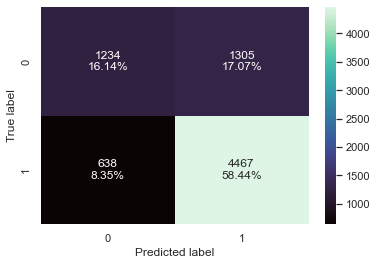

<IPython.core.display.Javascript object>

In [99]:
confusion_matrix_sklearn(gb_tuned, X_test, y_test)

There's not much difference between the tuned and the raw model. Let's see the performance in detail:

In [100]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Gradient Boosting Classifier (tuned) - train", gb_tuned, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Gradient Boosting Classifier (tuned) - test", gb_tuned, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585
4,Bagging Classifier - train,0.9851,0.9867,0.9909,0.9888
5,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740
6,Bagging Classifier (tuned) - train,0.7943,0.8305,0.8571,0.8436
7,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943
8,Random Forest Classifier - train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Classifier - test,0.7231,0.8441,0.7654,0.8028


<IPython.core.display.Javascript object>

Tuning reduced overfitting a bit, but at the cost of a slight impairment of performance. It seems default hyperparameters were good enough already and tuning didn't add much value.

### Feature Importance (Tuned Gradient Boosting Classifier):

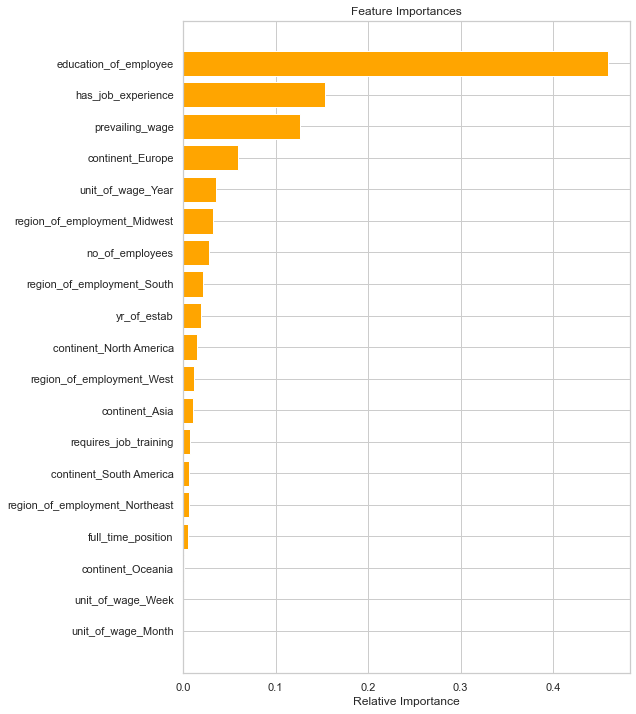

<IPython.core.display.Javascript object>

In [101]:
feat_importance(gb_tuned, X_train)

* The most important features for the Gradient Boosting model are Education level of employee, his previous job experience and the position's prevailing wages.Other significative features:
    * Continent of origin being Europe,
    * Unit of Prevailing wages being USD/year,
    * Position location (Midwest),
    * Among others.

### XGBoosting Classifier:

In [102]:
# Fitting the model
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

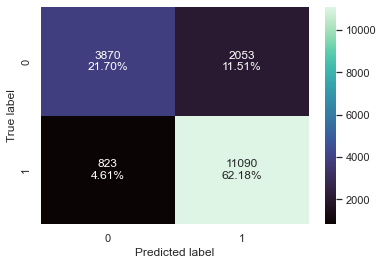

<IPython.core.display.Javascript object>

In [103]:
confusion_matrix_sklearn(xgb, X_train, y_train)

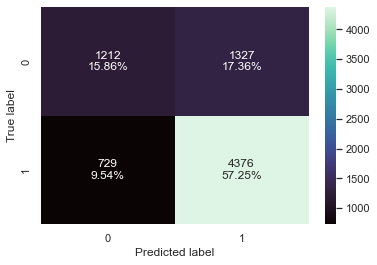

<IPython.core.display.Javascript object>

In [104]:
confusion_matrix_sklearn(xgb, X_test, y_test)

The XGBoost algorithm got very good results with the default hyperparameter settings, while overfitting more than the Gradient Boosting model.

In [105]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "XGBoosting Classifier - train", xgb, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "XGBoosting Classifier - test", xgb, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585
4,Bagging Classifier - train,0.9851,0.9867,0.9909,0.9888
5,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740
6,Bagging Classifier (tuned) - train,0.7943,0.8305,0.8571,0.8436
7,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943
8,Random Forest Classifier - train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Classifier - test,0.7231,0.8441,0.7654,0.8028


<IPython.core.display.Javascript object>

The "raw" XGBoost model is a good predictor already, but tuning might improve its performance.

### XGBoosting Classifier - Tuned:

In [106]:
# Choose the type of classifier.
xgb_model = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(100, 141, 20),
    "scale_pos_weight": [1, 2],
    "subsample": [0.8, 0.9, 1],
    "learning_rate": np.arange(0.05, 0.16, 0.05),
    "colsample_bytree": [0.5, 0.7, 0.9],
    "colsample_bylevel": [0.5, 0.7, 0.9],
    "gamma": [4, 5],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_model, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=5, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

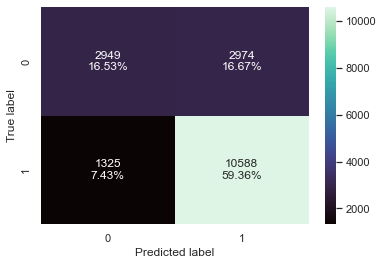

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

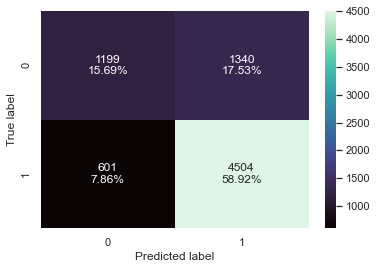

<IPython.core.display.Javascript object>

In [108]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

Tuning improved overfitting a lot, while also improving performance in terms of accuracy.

In [109]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "XGBoosting Classifier (tuned) - train", xgb_tuned, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "XGBoosting Classifier (tuned) - test", xgb_tuned, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585
4,Bagging Classifier - train,0.9851,0.9867,0.9909,0.9888
5,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740
6,Bagging Classifier (tuned) - train,0.7943,0.8305,0.8571,0.8436
7,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943
8,Random Forest Classifier - train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Classifier - test,0.7231,0.8441,0.7654,0.8028


<IPython.core.display.Javascript object>

The tuned XGBoost Classifier model surpasses every other model in terms of performance, with very little overfitting.

### Feature Importance (Tuned XGBoost Classifier):

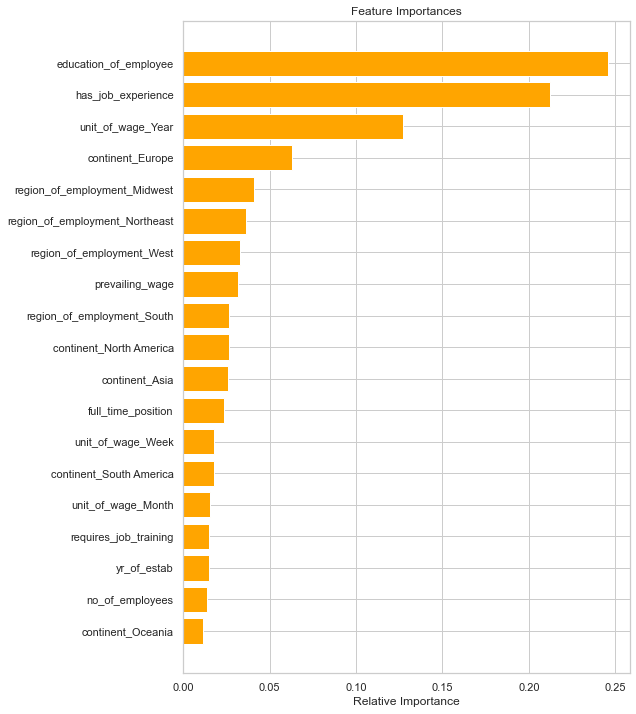

<IPython.core.display.Javascript object>

In [110]:
feat_importance(xgb_tuned, X_train)

* The most important features for the XGBoost model are Education level of employee, his previous job experience and the unit of prevailing wage being USD/year. Other significative features:
    * Continent of origin being Europe,
    * Position location (various dummies),
    * Prevailing wages for the position,
    * Among others.

### Model Performance and Overfitting Comparison:

In [111]:
# testing set prediction performance, all models, ordered
model_perf_tracker[model_perf_tracker["Model"].str.contains(" - test")].sort_values(
    by="F1", ascending=False
).reset_index(drop=True)

,Model,Accuracy,Recall,Precision,F1
0,XGBoosting Classifier (tuned) - test,0.7461,0.8823,0.7707,0.8227
1,Gradient Boosting Classifier - test,0.7458,0.8768,0.7731,0.8217
2,Gradient Boosting Classifier (tuned) - test,0.7458,0.8750,0.7739,0.8214
3,XGBoosting Classifier - test,0.7310,0.8572,0.7673,0.8098
4,Random Forest Classifier - test,0.7231,0.8441,0.7654,0.8028
5,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943
6,Random Forest Classifier (tuned) - test,0.7244,0.7724,0.8067,0.7892
7,AdaBoost Classifier (tuned) - test,0.7165,0.7816,0.7914,0.7864
8,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740
9,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585


<IPython.core.display.Javascript object>

**Pre-stacking observations (testing performance):**
* The best performing tuned models (by F1-score), when comparing their predictins on testing sets, were:
    1. XGBoost classifier,
    2. Gradient Boosting Classifier (tuned and raw were very close),
    3. Bagging Classifier, and
    4. Random Forest Classifier.
* The "worst" tuned model (while not being bad at all) was the Decision Tree Classifier.

In [112]:
# Dataframe containing percentual difference between training and testing sets performance (overfitting) for each model
overfit_tracker = pd.concat(
    [
        model_perf_tracker[model_perf_tracker["Model"].str.contains(" - test")]
        .reset_index(drop=True)
        .iloc[:, 0]
        .str.replace(" - test", "", regex=True),
        (
            (
                model_perf_tracker[model_perf_tracker["Model"].str.contains(" - test")]
                .reset_index(drop=True)
                .iloc[:, 1:]
            )
            / (
                model_perf_tracker[model_perf_tracker["Model"].str.contains(" - train")]
                .reset_index(drop=True)
                .iloc[:, 1:]
            )
            - 1
        )
        * 100,
    ],
    axis=1,
)
overfit_tracker.sort_values(by="F1", ascending=False).reset_index(drop=True)

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree (tuned),-0.2318,0.2656,-0.4588,-0.0697
1,AdaBoost Classifier (tuned),-0.3923,-0.0532,-0.4014,-0.2262
2,Gradient Boosting Classifier (tuned),-1.5007,-0.5233,-1.2139,-0.8897
3,Gradient Boosting Classifier,-1.5371,-0.4748,-1.2741,-0.8996
4,XGBoosting Classifier (tuned),-1.6990,-0.7319,-1.2816,-1.0253
5,Random Forest Classifier (tuned),-6.5620,-4.5700,-4.7926,-4.6789
6,Bagging Classifier (tuned),-8.3827,-5.2552,-6.4571,-5.8505
7,XGBoosting Classifier,-12.8431,-7.9188,-9.0638,-8.5229
8,Random Forest Classifier,-27.6949,-15.5926,-23.4636,-19.7205
9,Bagging Classifier,-29.4422,-20.7511,-22.6741,-21.7224


<IPython.core.display.Javascript object>

**Pre-stacking observations (overfitting):**
* Surprisingly, the model with less overfit is the tuned Decision Tree, followed by the tuned AdaBoost model.
* All in all, the tuned Gradient Boosting and XGBoost models show a very small overfit.
* The worst overfitters are all "raw" models: Decision Tree, Bagging, Random Forest an AdaBoost.
* The worst overfitter among tuned models was the Bagging Classifier.

#### Model selection for Stacking:

The models to be used for the Stacking model will be:
* Decision Tree (tuned), because it had a decent performance and the least overfitting.
* AdaBoosting Classifier (tuned), as it showed a great performance and very little overfitting.
* Gradient Boosting Classifier (tuned) because of its great performance and decent overfitting.
* XGBoost Classifier (tuned) will be used as the final estimator because it's the best performing model while keeping overfitting low.

## Building a Stacking Model:

In [113]:
estimators = [
    ("AdaBoosting", ab_tuned),
    ("Gradient Boosting", gb_tuned),
    ("Decision Tree", d_tree_tuned),
]

final_estimator = xgb_tuned

stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

stack.fit(X_train, y_train)

StackingClassifier(estimators=[('AdaBoosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                                                       1: 0.33},
                                                                                         max_depth=1),
                                                   learning_rate=0.1,
                                                   n_estimators=101,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree',
                                DecisionTreeClassif...
         

<IPython.core.display.Javascript object>

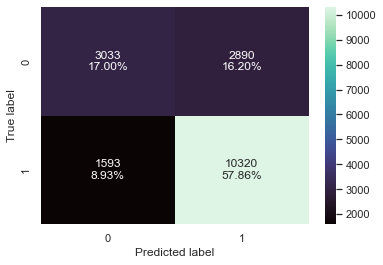

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_sklearn(stack, X_train, y_train)

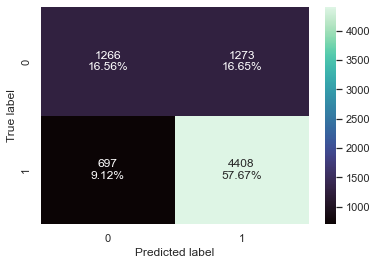

<IPython.core.display.Javascript object>

In [115]:
confusion_matrix_sklearn(stack, X_test, y_test)

The Stacking Classifier shows high accuracy and recall levels and doesn't seem to be overfitting.

In [116]:
# Adding to the performance tracker
model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Stacking Classifier - train", stack, X_train, y_train,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker = pd.concat(
    [
        model_perf_tracker,
        model_performance_classification_sklearn(
            "Stacking Classifier - test", stack, X_test, y_test,
        ),
    ],
    ignore_index=True,
)

model_perf_tracker

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree - train,1.0000,1.0000,1.0000,1.0000
1,Decision Tree - test,0.6516,0.7467,0.7356,0.7411
2,Decision Tree (tuned) - train,0.7014,0.7041,0.8232,0.7590
3,Decision Tree (tuned) - test,0.6998,0.7060,0.8195,0.7585
4,Bagging Classifier - train,0.9851,0.9867,0.9909,0.9888
5,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740
6,Bagging Classifier (tuned) - train,0.7943,0.8305,0.8571,0.8436
7,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943
8,Random Forest Classifier - train,1.0000,1.0000,1.0000,1.0000
9,Random Forest Classifier - test,0.7231,0.8441,0.7654,0.8028


<IPython.core.display.Javascript object>

The Stacking Classifier Model got very good results, a performance only surpassed by the Gradient Boosting and XGBoost models, while keeping overfitting very low.

### Feature Importances (Stacking Classifier):

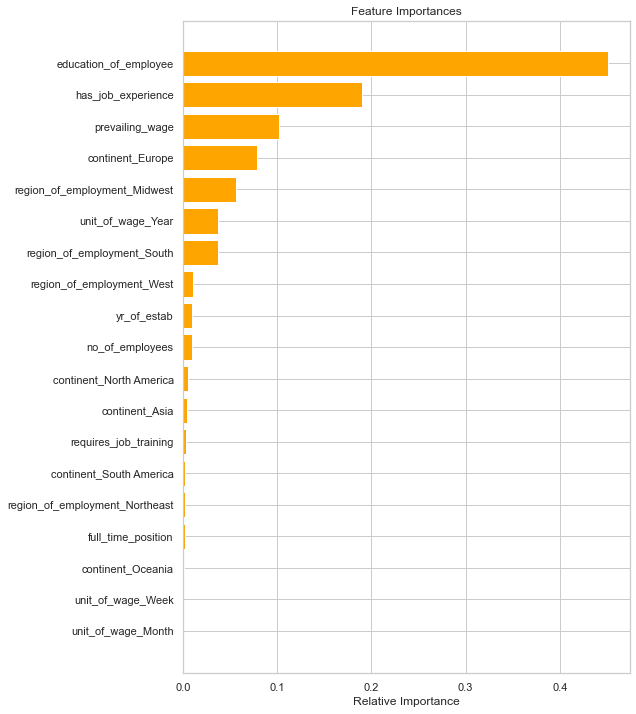

<IPython.core.display.Javascript object>

In [117]:
# Exercise in taking a mean of the feature relative importances of the components of the stacking model
importances = np.mean(
    [
        estimator[1].feature_importances_
        for estimator in stack.named_estimators_.items()
    ],
    axis=0,
)

# importances = np.mean(importances, axis=0)
indices = np.argsort(importances)
feature_names = X_train.columns.tolist()

plt.figure(figsize=(8, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features for the stacking model are Education level of employee and his previous job experience. Other significative features:
    * Prevailing wages for the position,
    * Continent of origin being Europe,
    * Position located in Midwest region,
    * The unit of prevailing wages being USD/year,
    * Position located in South region.
    * Other features are much less relevant.

### Final Model Comparison:

In [118]:
# testing set prediction performance, all models
model_perf_tracker[model_perf_tracker["Model"].str.contains(" - test")].sort_values(
    by="F1", ascending=False
).reset_index(drop=True)

,Model,Accuracy,Recall,Precision,F1
0,XGBoosting Classifier (tuned) - test,0.7461,0.8823,0.7707,0.8227
1,Gradient Boosting Classifier - test,0.7458,0.8768,0.7731,0.8217
2,Gradient Boosting Classifier (tuned) - test,0.7458,0.8750,0.7739,0.8214
3,Stacking Classifier - test,0.7423,0.8635,0.7759,0.8174
4,XGBoosting Classifier - test,0.7310,0.8572,0.7673,0.8098
5,Random Forest Classifier - test,0.7231,0.8441,0.7654,0.8028
6,Bagging Classifier (tuned) - test,0.7278,0.7869,0.8018,0.7943
7,Random Forest Classifier (tuned) - test,0.7244,0.7724,0.8067,0.7892
8,AdaBoost Classifier (tuned) - test,0.7165,0.7816,0.7914,0.7864
9,Bagging Classifier - test,0.6951,0.7820,0.7662,0.7740


<IPython.core.display.Javascript object>

**Final Observations (performance):**
* The tuned XGBoost Classifier is still the best performing model, followed by the Gradient Boosting Classifier.
* The Stacking model came up third place.

In [119]:
# Dataframe containing percentual difference between training and testing sets performance (overfitting) for each model
overfit_tracker = pd.concat(
    [
        model_perf_tracker[model_perf_tracker["Model"].str.contains(" - test")]
        .reset_index(drop=True)
        .iloc[:, 0]
        .str.replace(" - test", "", regex=True),
        (
            (
                model_perf_tracker[model_perf_tracker["Model"].str.contains(" - test")]
                .reset_index(drop=True)
                .iloc[:, 1:]
            )
            / (
                model_perf_tracker[model_perf_tracker["Model"].str.contains(" - train")]
                .reset_index(drop=True)
                .iloc[:, 1:]
            )
            - 1
        )
        * 100,
    ],
    axis=1,
)
overfit_tracker.sort_values(by="F1", ascending=False).reset_index(drop=True)

,Model,Accuracy,Recall,Precision,F1
0,Decision Tree (tuned),-0.2318,0.2656,-0.4588,-0.0697
1,AdaBoost Classifier (tuned),-0.3923,-0.0532,-0.4014,-0.2262
2,Stacking Classifier,-0.8512,-0.3248,-0.6793,-0.5115
3,Gradient Boosting Classifier (tuned),-1.5007,-0.5233,-1.2139,-0.8897
4,Gradient Boosting Classifier,-1.5371,-0.4748,-1.2741,-0.8996
5,XGBoosting Classifier (tuned),-1.6990,-0.7319,-1.2816,-1.0253
6,Random Forest Classifier (tuned),-6.5620,-4.5700,-4.7926,-4.6789
7,Bagging Classifier (tuned),-8.3827,-5.2552,-6.4571,-5.8505
8,XGBoosting Classifier,-12.8431,-7.9188,-9.0638,-8.5229
9,Random Forest Classifier,-27.6949,-15.5926,-23.4636,-19.7205


<IPython.core.display.Javascript object>

**Final Observations (overfitting):**
* Among the best performing models, the Stacking Classifier is the least overfitting of them all by far (about half the percentual difference between training and testing set performances).
* While the tuned Decision Tree Classifier is the least overfitting of all models, it is also the worst performer.
* Balancing performance and overfitting considerations, the **Stacking Classifier** model seems to be the best qualified model for business application, as it's more likely that it will perform better on new data.

## Model Selection and Conclusions

* The **Stacking Classifier** model was selected as the best under this dataset and conditions of analysis, for the task of shortlisting visa candidates for the OFLC. The decision is based on said model's good performance metrics and low overfitting (good generalization).
* As said before, the most important features for the stacking model are the **Education level of the employee** and his **previous job experience**. Other significative features:
    * Prevailing wages for the position,
    * Continent of origin being Europe,
    * Position located in Midwest region,
    * The unit of prevailing wages being USD/year,
    * Position located in South region.
    * Other features are much less relevant.
* The conclusions from the EDA and the model's feature importances seem to reveal a bias in the approval process favoring European applicants, which might be due to the high proportion of applicants with higher education and overall, doctorates, meaning Education level and continent of origin are not completely independent variables.
* Other apparent bias is favoring positions located in the Midwest, among others. More information is needed to figure out if there are confounders in non-available data.

## Actionable Insights and Recommendations

* The OFLC must be warned that **this prediction model is not, and it can not be 100% accurate**. For the purposes of shortlisting candidates this might not be a problem, but the model will also reject a number of applicants worth approving (recall being 86%, **about 14% of worthy applicants might be rejected**).
* If the OFLC prefers a higher **recall** performance, this notebook can be run again after setting up the **recall** score for purposes of model tuning instead of the **F1-score**. It can be updated and informed in a few hours (the composition of the Stacking model might change after assessing the other models' relative performances).
* The OFLC can also use the **precision** score of the model (approx. 76%) to benchmark the proportion of the shortlist that finally gets visa approval.
* The EDA observations plus the feature importances can help inform the processing of the shortlisted candidates too, and reprocessing good candidates rejected by the model if the client feels the need to do so.

### Suggested further research and analysis:
* Confirm that the values of the prevailing wages are expressed in USD/year or correct if necessary.
* More information is needed about the features of the different job positions related to each applicant (if it's a low-skilled job, for instance)
* Other information like the age and line of work of each applicant would be useful to understand this phenomenon better.
* The former recommendations might help reduce the model's apparent biases.